In [1]:
# Import packages....


import numpy as np 
import matplotlib.pyplot as plt 
import math 
import random
from scipy import stats
import datetime
import scipy
import copy
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
from mpl_toolkits.axes_grid.inset_locator import inset_axes
import pandas as pd
import networkx as nx 
import matplotlib.patches as mpatches
from matplotlib.offsetbox import (DrawingArea, OffsetImage,AnnotationBbox)

# Import functions...
from definitions_clean_RR import *


<ipython-input-1-0aec77787256>:13: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes


# Analysing True/False data set
We reproduce some figures from Vosoughi et al. and introduce a subsampling method to control for size. We also plot joint distributions of structural properties explicitly and count the prevalence of every possible rooted tree of size 3-6 in the data set of true and false-news cascades on Twitter.

In [2]:
# TRUE / FALSE ANALYSIS


# IMPORT data
cascade_data, cascade_data_categories = import_truefalsedata()

# Choices to make 
# ----------------

# Repeat the subsampling many times?
sample_many_times = False 

# If so, how many times?
sample_N_times = 10000

Reading metadata...
Make sure that the Prufer Sequence has been saved for each cascade. Key should be 'prufer_sequence'. Networkx can help get the prufer sequence for each cascade when build with Vosoughi et al.'s code.


In [3]:
# Get structural distributions of full true and false data set 
# ---------------

_,topology_TRUE=sample_topology(1,cascade_data,treatment_name = 'TRUE',control_name = 'TRUE')
_,topology_FALSE=sample_topology(1,cascade_data,treatment_name = 'FALSE',control_name = 'FALSE')


_,example_cascades=sample_topology(1,cascade_data, treatment_name = 'TRUE', control_name = 'FALSE')
sample_many_times = False
if (sample_many_times == True) : 
     
    # First sample many times
    sampled_pvalues,example_cascades=sample_topology(sample_N_times,cascade_data)
    
    # Now save dicts so we don't have to spend all this time again...
    destination='Outputs/'
    np.save(destination+'FalseTrue_KSpvalues.npy',sampled_pvalues)
    np.save(destination+'FalseTrue_ExampleCurves.npy',result_dic)
    
    
    # First sample many times
    sampled_pvalues_3andabove,example_cascades_3andabove=sample_topology(sample_N_times,cascade_data,also_below_3=False)
    
    # Now save dicts so we don't have to spend all this time again...
    destination='Outputs/'
    np.save(destination+'FalseTrue_KSpvalues_3andabove.npy',sampled_pvalues_3andabove)
    np.save(destination+'FalseTrue_ExampleCurves_3andabove.npy',result_dic_3andabove)

sample_many_times = False
# Load results from when we sampled many times
destination='Outputs/'
sampled_pvalues = np.load(destination+'FalseTrue_KSpvalues.npy',allow_pickle = True).item()
result_dic = np.load(destination+'FalseTrue_ExampleCurves.npy',allow_pickle = True).item()    

sampled_pvalues_3andabove = np.load(destination+'FalseTrue_KSpvalues_3andabove.npy',allow_pickle = True).item()
result_dic_3andabove = np.load(destination+'FalseTrue_ExampleCurves_3andabove.npy',allow_pickle = True).item()    

# Examine the KS values
KS_minimum_and_quantile(sampled_pvalues,features=['size','depth','max_breadth','virality'],quantile=0.05)

Doing experiment 0 out of 1
Doing experiment 0 out of 1
Doing experiment 0 out of 1

 KS statistics :
----------------
size 
	minimum KS value: 1.0 
	95.0 percent of values above: 1.0 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
depth 
	minimum KS value: 0.37776666509083906 
	95.0 percent of values above: 0.7221543450461375 

	maximum KS value: 1.0 
	95.0 percent of values below: 0.9999285925180587
max_breadth 
	minimum KS value: 0.9727673730572529 
	95.0 percent of values above: 0.9977246239925819 

	maximum KS value: 1.0 
	95.0 percent of values below: 0.9999999999450204
virality 
	minimum KS value: 0.9556477183793389 
	95.0 percent of values above: 0.9994192215024646 

	maximum KS value: 1.0 
	95.0 percent of values below: 0.99999999999434

----------------


In [4]:
KS_make_table(cascade_data,sampled_pvalues,['size','depth','max_breadth','virality'],quantile=0.05)

\begin{table}

	\begin{tabular}{l c c c c c}\\ 

		 \hline
		 Quantity & $p$ (US) & $\min{p}$ (S)  & $\max{p}$ (S) & 95pct of $p$ above (S) & 95pct of $p$ below (S)\\ 
		 \hline
		 Size & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		 Depth & 0.00 & 0.38 & 1.00 & 0.72 & 1.00 \\
		 Max-Breadth & 0.00 & 0.97 & 1.00 & 1.00 & 1.00 \\
		 Virality & 0.00 & 0.96 & 1.00 & 1.00 & 1.00 \\
		\hline
	\end{tabular}
	\caption{INSERT CAPTION \label{sup:tab:INSERT FIGNAME}}
\end{table}


In [5]:
KS_make_table(cascade_data,sampled_pvalues_3andabove,['size','depth','max_breadth','virality'],quantile=0.05)

\begin{table}

	\begin{tabular}{l c c c c c}\\ 

		 \hline
		 Quantity & $p$ (US) & $\min{p}$ (S)  & $\max{p}$ (S) & 95pct of $p$ above (S) & 95pct of $p$ below (S)\\ 
		 \hline
		 Size & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		 Depth & 0.00 & 0.00 & 1.00 & 0.00 & 0.46 \\
		 Max-Breadth & 0.00 & 0.05 & 1.00 & 0.27 & 0.91 \\
		 Virality & 0.00 & 0.05 & 1.00 & 0.35 & 0.95 \\
		\hline
	\end{tabular}
	\caption{INSERT CAPTION \label{sup:tab:INSERT FIGNAME}}
\end{table}


In [6]:
# Get temporal analysis of false/true data set
# ----------------------------------------------

# Get temporal analysis for full data sets
median_timesingle = temporal_analysis_single(cascade_data)

# Sample many times
sample_many_times = False
if (sample_many_times == True) : 

    # Sample N times with time series...
    gmean_dic,example_time=sample_time(sample_N_times,cascade_data,treatment_name='TRUE',control_name='FALSE')
    
    # Now save dicts so we don't have to spend all this time again...
    destination='Outputs/'
    np.save(destination+'FalseTrue_mediantime.npy',median_time)
    np.save(destination+'FalseTrue_time05.npy',time05)
    np.save(destination+'FalseTrue_time95.npy',time95)

# Load results from temporal analysis...
destination='Outputs/'
median_time = np.load(destination+'FalseTrue_mediantime.npy',allow_pickle=True).item()
time05 = np.load(destination+'FalseTrue_time05.npy',allow_pickle=True).item()
time95 = np.load(destination+'FalseTrue_time95.npy',allow_pickle=True).item()



Doing experiment 0 out of 1


/home/jlj/env3/lib/python3.8/site-packages/scipy/stats/stats.py:339: RuntimeWarning: Mean of empty slice.
  return np.exp(log_a.mean(axis=axis))
/home/jlj/env3/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jlj/env3/lib/python3.8/site-packages/scipy/stats/stats.py:338: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


Doing experiment 0 out of 1
46894


/home/jlj/Dropbox/PhD/Structural_virality/Aral_method_test/definitions_clean_RR.py:1946: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


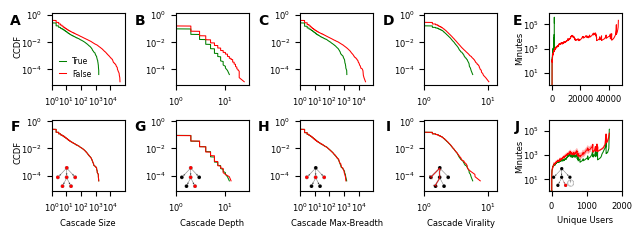

In [7]:
# PLOT:
# -------

# destinations:
destinations = ['Outputs/Figures/','../../Papers/false_and_true_news/Figures/']
FalseTrue_ccdfs(topology_TRUE,topology_FALSE,example_cascades,median_timesingle,median_time,time05,time95,destinations)
 


(0.5840414533278914, 80293.95813052385)


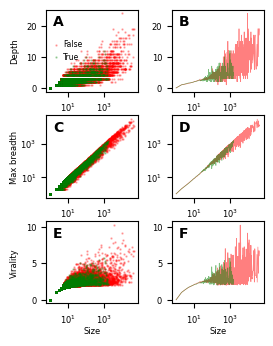

In [8]:
# Make joint distributions

cascade_scatter = get_cascade_scatter(cascade_data)
cascade_lines = get_cascade_lines(cascade_scatter,cascade_data)

FalseTrue_joint(cascade_scatter,cascade_lines,destinations)



[0.13246566500656387, 0.0006612346479040188, 0.024798121686566588, 0.13805631807350038]
[ 4.0428636  14.64280358  7.39397473  3.96018715]


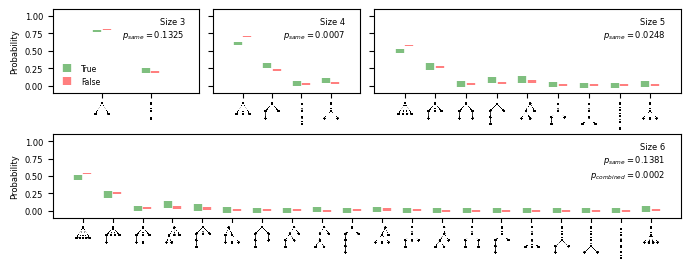

In [9]:
# Fig 3: Rooted trees

if (sample_many_times == True) :
    result_dic,stars_result_dic = count_rooted_trees()
    destination='Outputs/'
    np.save(destination+'FalseTrue_ManuallyCountedSmallCascades.npy',result_dic)
    np.save(destination+'FalseTrue_ManuallyCountedStars.npy',stars_result_dic)
    
counted_cascades = np.load(destination+'FalseTrue_ManuallyCountedSmallCascades.npy',allow_pickle = True).item()
counted_stars = np.load(destination+'FalseTrue_ManuallyCountedStars.npy',allow_pickle=True).item()

plot_vecs,p_TrueFalse_combined,p_TrueFalse_arr = rooted_trees_statistics(counted_cascades,keys=['TRUE','FALSE'])

rootedtrees_sharetick(plot_vecs,keys=['TRUE','FALSE'],colors=['g','r'],p_combined=p_TrueFalse_combined,p_arr=p_TrueFalse_arr,model_name='',destinations=destinations)

In [10]:
# Rumour categories: Political false vs other false
# --------------------------------------
print ("Rumour categories: Political false vs other false")
print("--------------------------------------\n \n")

_,topology_Other=sample_topology(1,cascade_data_categories,treatment_name = 'Other',control_name = 'Other')
_,topology_Politics=sample_topology(1,cascade_data_categories,treatment_name = 'Politics',control_name = 'Politics')

median_timesingle_categories =  temporal_analysis_single_categories(cascade_data_categories)


if (sample_many_times == True) : 
    
    # First sample many times
    
    sampled_pvalues_categories,example_cascades_categories=sample_topology(sample_N_times,cascade_data_categories,treatment_name='Other',control_name='Politics')    
    
    # Save dicts...
    destination='Outputs/'
    np.save(destination+'PoliticsOther_KSpvalues.npy',sampled_pvalues_categories)
    np.save(destination+'PoliticsOther_ExampleCurves.npy',example_cascades_categories)

    
    
    # Temporal analysis..
    gmean_dic_categories,example_time_categories=sample_time(10000,cascade_data_categories,treatment_name='Other',control_name='Politics')    
    median_time_categories,time05_categories,time95_categories = temporal_analysis_categories(gmean_dic_categories)
    
    # Save dicts...
    destination='Outputs/'
    np.save(destination+'PoliticsOther_mediantime.npy',median_time_categories)
    np.save(destination+'PoliticsOther_time05.npy',time05_categories)
    np.save(destination+'PoliticsOther_time95.npy',time95_categories)    
    
    # First sample many times
    sampled_pvalues_3andabove_categories,example_cascades_3andabove_categories=sample_topology(sample_N_times,cascade_data_categories,treatment_name='Other',control_name='Politics',also_below_3=False)
    
    # Now save dicts so we don't have to spend all this time again...
    destination='Outputs/'
    np.save(destination+'FalseTrue_KSpvalues_3andabove_categories.npy',sampled_pvalues_3andabove_categories)
    np.save(destination+'FalseTrue_ExampleCurves_3andabove_categories.npy',example_cascades_3andabove_categories)

    
    
    
# Load dicts..
destination='Outputs/'
sampled_pvalues_categories = np.load(destination+'PoliticsOther_KSpvalues.npy',allow_pickle = True).item()
example_cascades_categories = np.load(destination+'PoliticsOther_ExampleCurves.npy',allow_pickle = True).item()

    
# Load dicts..
#destination='Outputs/'
#sampled_pvalues_3andabove_categories = np.load(destination+'PoliticsOther_KSpvalues_3andabove.npy',allow_pickle = True).item()
#example_cascades_3andabove_categories = np.load(destination+'PoliticsOther_ExampleCurves_3andabove.npy',allow_pickle = True).item()
    

# Load dicts..
destination='Outputs/'
median_time_categories = np.load(destination+'PoliticsOther_mediantime.npy',allow_pickle = True).item()
time05_categories = np.load(destination+'PoliticsOther_time05.npy',allow_pickle = True).item()
time95_categories = np.load(destination+'PoliticsOther_time95.npy',allow_pickle = True).item()


# Examine the KS values
KS_minimum_and_quantile(sampled_pvalues_categories,features=['size','depth','max_breadth','virality'],quantile=0.05)


Rumour categories: Political false vs other false
--------------------------------------
 

Doing experiment 0 out of 1
Doing experiment 0 out of 1
Doing experiment 0 out of 1


/home/jlj/env3/lib/python3.8/site-packages/scipy/stats/stats.py:339: RuntimeWarning: Mean of empty slice.
  return np.exp(log_a.mean(axis=axis))
/home/jlj/env3/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jlj/env3/lib/python3.8/site-packages/scipy/stats/stats.py:338: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


Doing experiment 0 out of 1
46894

 KS statistics :
----------------
size 
	minimum KS value: 1.0 
	95.0 percent of values above: 1.0 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
depth 
	minimum KS value: 0.025452990708470208 
	95.0 percent of values above: 0.104462900630786 

	maximum KS value: 0.7515533000113297 
	95.0 percent of values below: 0.42701600444873367
max_breadth 
	minimum KS value: 0.5616308505544403 
	95.0 percent of values above: 0.7475352470522824 

	maximum KS value: 0.9948285556290233 
	95.0 percent of values below: 0.9519171606433319
virality 
	minimum KS value: 0.3094369793674482 
	95.0 percent of values above: 0.5018093364248702 

	maximum KS value: 0.9727543930718318 
	95.0 percent of values below: 0.8457340070088705

----------------


In [11]:
# All cascades.
print("POLITICS / OTHER TABLE")
print("-----------------------\n\n")
KS_make_table(cascade_data_categories,sampled_pvalues_categories,['size','depth','max_breadth','virality'],quantile=0.05)

POLITICS / OTHER TABLE
-----------------------


\begin{table}

	\begin{tabular}{l c c c c c}\\ 

		 \hline
		 Quantity & $p$ (US) & $\min{p}$ (S)  & $\max{p}$ (S) & 95pct of $p$ above (S) & 95pct of $p$ below (S)\\ 
		 \hline
		 Size & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		 Depth & 0.00 & 0.03 & 0.75 & 0.10 & 0.43 \\
		 Max-Breadth & 0.00 & 0.56 & 0.99 & 0.75 & 0.95 \\
		 Virality & 0.00 & 0.31 & 0.97 & 0.50 & 0.85 \\
		\hline
	\end{tabular}
	\caption{INSERT CAPTION \label{sup:tab:INSERT FIGNAME}}
\end{table}


/home/jlj/Dropbox/PhD/Structural_virality/Aral_method_test/definitions_clean_RR.py:4882: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


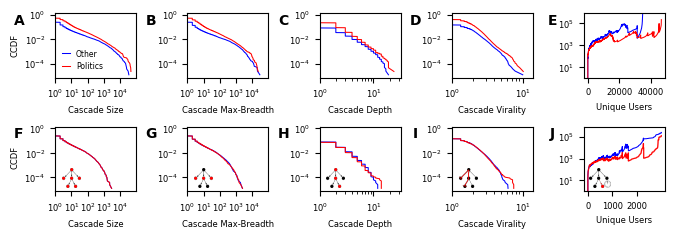

In [12]:
PoliticalOther_5ccdfs(topology_Other,topology_Politics,example_cascades_categories,median_timesingle_categories,median_time_categories,time05_categories,time95_categories,destinations)


### Politics vs Pictures

In [13]:
# Rumour categories: Political false vs other false
# --------------------------------------
print ("Rumour categories: Political false vs Urban false")
print("--------------------------------------\n \n")

_,topology_Urban=sample_topology(1,cascade_data_categories,treatment_name = 'Urban',control_name = 'Urban')
_,topology_Politics=sample_topology(1,cascade_data_categories,treatment_name = 'Politics',control_name = 'Politics')

median_timesingle_categories =  temporal_analysis_single_categories(cascade_data_categories)

sample_many_times = False
sample_N_times = 100
if (sample_many_times == True) : 
    
    # First sample many times
    
    sampled_pvalues_categories,example_cascades_categories=sample_topology(sample_N_times,cascade_data_categories,treatment_name='Urban',control_name='Politics')    
    
    # Save dicts...
    destination='Outputs/'
    np.save(destination+'PoliticsUrban_KSpvalues.npy',sampled_pvalues_categories)
    np.save(destination+'PoliticsUrban_ExampleCurves.npy',example_cascades_categories)

    
    
    # Temporal analysis..
    gmean_dic_categories,example_time_categories=sample_time(sample_N_times,cascade_data_categories,treatment_name='Urban',control_name='Politics')    
    median_time_categories,time05_categories,time95_categories = temporal_analysis_categoriesURBAN(gmean_dic_categories)
    
    # Save dicts...
    destination='Outputs/'
    np.save(destination+'PoliticsUrban_mediantime.npy',median_time_categories)
    np.save(destination+'PoliticsUrban_time05.npy',time05_categories)
    np.save(destination+'PoliticsUrban_time95.npy',time95_categories)    
    
    # First sample many times
    sampled_pvalues_3andabove_categories,example_cascades_3andabove_categories=sample_topology(sample_N_times,cascade_data_categories,treatment_name='Urban',control_name='Politics',also_below_3=False)
    
    # Now save dicts so we don't have to spend all this time again...
    destination='Outputs/'
    np.save(destination+'FalseTrue_KSpvalues_3andabove_categoriesURBAN.npy',sampled_pvalues_3andabove_categories)
    np.save(destination+'FalseTrue_ExampleCurves_3andabove_categoriesURBAN.npy',example_cascades_3andabove_categories)

    
    
    
# Load dicts..
destination='Outputs/'
sampled_pvalues_categories = np.load(destination+'PoliticsUrban_KSpvalues.npy',allow_pickle = True).item()
example_cascades_categories = np.load(destination+'PoliticsUrban_ExampleCurves.npy',allow_pickle = True).item()

    
# Load dicts..
#destination='Outputs/'
#sampled_pvalues_3andabove_categories = np.load(destination+'PoliticsOther_KSpvalues_3andabove.npy',allow_pickle = True).item()
#example_cascades_3andabove_categories = np.load(destination+'PoliticsOther_ExampleCurves_3andabove.npy',allow_pickle = True).item()
    

# Load dicts..
destination='Outputs/'
median_time_categories = np.load(destination+'PoliticsUrban_mediantime.npy',allow_pickle = True).item()
time05_categories = np.load(destination+'PoliticsUrban_time05.npy',allow_pickle = True).item()
time95_categories = np.load(destination+'PoliticsUrban_time95.npy',allow_pickle = True).item()


# Examine the KS values
KS_minimum_and_quantile(sampled_pvalues_categories,features=['size','depth','max_breadth','virality'],quantile=0.05)


Rumour categories: Political false vs Urban false
--------------------------------------
 

Doing experiment 0 out of 1
Doing experiment 0 out of 1
Doing experiment 0 out of 1


/home/jlj/env3/lib/python3.8/site-packages/scipy/stats/stats.py:339: RuntimeWarning: Mean of empty slice.
  return np.exp(log_a.mean(axis=axis))
/home/jlj/env3/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jlj/env3/lib/python3.8/site-packages/scipy/stats/stats.py:338: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


Doing experiment 0 out of 1
46894

 KS statistics :
----------------
size 
	minimum KS value: 1.0 
	95.0 percent of values above: 1.0 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
depth 
	minimum KS value: 0.7972400975798383 
	95.0 percent of values above: 0.88506866876441 

	maximum KS value: 0.9999999889171765 
	95.0 percent of values below: 0.9999873049625155
max_breadth 
	minimum KS value: 0.9973681868498804 
	95.0 percent of values above: 0.9997409687507907 

	maximum KS value: 0.9999999999999967 
	95.0 percent of values below: 0.9999999986473471
virality 
	minimum KS value: 0.9835070881974673 
	95.0 percent of values above: 0.9917091168613381 

	maximum KS value: 0.9999999971739587 
	95.0 percent of values below: 0.999999468930345

----------------


# SIR dynamics
Next we analyze cascades produced with the SIR model for spreading processes.


In [16]:
# Import SIR DATA
cascade_data_SIR = {}
N_cascades = 30000


for R0 in [0.8,0.9] :
    filename_cascades = 'SIR_data/Cascades_Rspread%s00000_MinimumCascadeSize1.txt'%R0
    filename_measures = 'SIR_data/Measures_Cascades_Rspread%s_MinimumCascadeSize1.txt'%R0
    cascade_data_SIR = model_topology_and_size(cascade_data_SIR,R0,filename_cascades,filename_measures,N_cascades)

In [17]:
# Full data set cascade figures.
sampled_pvalues_SIR08only,example_cascades_SIR08only=sample_topology(1,cascade_data_SIR,treatment_name=0.8,control_name=0.8)
sampled_pvalues_SIR09only,example_cascades_SIR09only=sample_topology(1,cascade_data_SIR,treatment_name=0.9,control_name=0.9)


full_SIR_data = {0.8:example_cascades_SIR08only[0.8],0.9:example_cascades_SIR09only[0.9]}

# Single example of subsampling
sampled_pvalues_SIR,example_cascades_SIR=sample_topology(1,cascade_data_SIR,treatment_name=0.8,control_name=0.9)

sample_many_times = False
if (sample_many_times == True) :
    sampled_pvalues_SIR,example_cascades_SIR=sample_topology(sample_N_times,cascade_data_SIR,treatment_name=0.8,control_name=0.9)
    
    # Save dicts...
    destination='Outputs/'
    np.save(destination+'SIR_KSpvalues.npy',sampled_pvalues_SIR)
    np.save(destination+'SIR_ExampleCurves.npy',example_cascades_SIR)

    # First sample many times
    sampled_pvalues_SIR_3andabove,example_cascades_SIR_3andabove=sample_topology(sample_N_times,cascade_data_SIR,treatment_name=0.8,control_name=0.9,also_below_3=False)
    
    # Now save dicts so we don't have to spend all this time again...
    destination='Outputs/'
    np.save(destination+'SIR_KSpvalues_3andabove.npy',sampled_pvalues_SIR_3andabove)
    np.save(destination+'SIR_ExampleCurves_3andabove.npy',result_dic_SIR_3andabove)    
    

# load results if we already sampled many times...
destination='Outputs/'
sampled_pvalues_SIR = np.load(destination+'SIR_KSpvalues.npy',allow_pickle = True).item()
example_cascades_SIR = np.load(destination+'SIR_ExampleCurves.npy',allow_pickle = True).item()

#sampled_pvalues_SIR_3andabove = np.load(destination+'SIR_KSpvalues_3andabove.npy',allow_pickle = True).item()
#example_cascades_SIR_3andabove = np.load(destination+'SIR_ExampleCurves_3andabovenpy',allow_pickle = True).item()


# Examine the KS values
KS_minimum_and_quantile(sampled_pvalues_SIR,features=['size','depth','max_breadth','virality'],quantile=0.05)


Doing experiment 0 out of 1
Doing experiment 0 out of 1
Doing experiment 0 out of 1

 KS statistics :
----------------
size 
	minimum KS value: 1.0 
	95.0 percent of values above: 1.0 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
depth 
	minimum KS value: 0.7995154703967687 
	95.0 percent of values above: 0.9928890847283063 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
max_breadth 
	minimum KS value: 0.7411547894836527 
	95.0 percent of values above: 0.9928890847283063 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
virality 
	minimum KS value: 0.9876775202975292 
	95.0 percent of values above: 0.9999841632025825 

	maximum KS value: 1.0 
	95.0 percent of values below: 0.9999999999999913

----------------


In [18]:
print("SIR TABLE")
print("-----------------------\n\n")
KS_make_table(cascade_data_SIR,sampled_pvalues_SIR,['size','depth','max_breadth','virality'],quantile=0.05)


SIR TABLE
-----------------------


\begin{table}

	\begin{tabular}{l c c c c c}\\ 

		 \hline
		 Quantity & $p$ (US) & $\min{p}$ (S)  & $\max{p}$ (S) & 95pct of $p$ above (S) & 95pct of $p$ below (S)\\ 
		 \hline
		 Size & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		 Depth & 0.00 & 0.80 & 1.00 & 0.99 & 1.00 \\
		 Max-Breadth & 0.00 & 0.74 & 1.00 & 0.99 & 1.00 \\
		 Virality & 0.00 & 0.99 & 1.00 & 1.00 & 1.00 \\
		\hline
	\end{tabular}
	\caption{INSERT CAPTION \label{sup:tab:INSERT FIGNAME}}
\end{table}


[  1  10 100]


/home/jlj/Dropbox/PhD/Structural_virality/Aral_method_test/definitions_clean_RR.py:5729: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


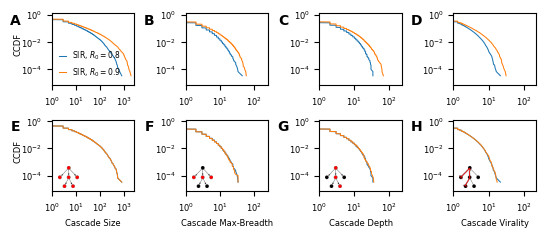

In [19]:
four_column_CCDF(full_SIR_data,example_cascades_SIR,keys=[0.8,0.9],plot_colors=['C0','C1'],model_name='SIR',fig_name='Fig',destinations=destinations)

[0.2709565986803216, 0.6719793251370667, 0.29978113854432653, 0.7426347907197812]
[2.61159325 0.79505541 2.40940522 0.59510178]


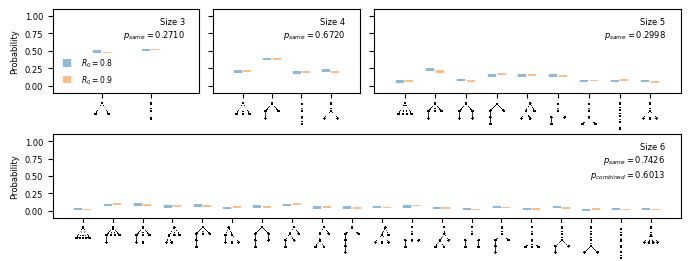

In [20]:
# Rooted trees...

# Count prevalence of rooted trees up to size 6 in False/True data set.
if (sample_many_times == True) :
    result_dic_SIR = count_rooted_trees_general()
    destination='Outputs/'
    np.save(destination+'SIR_RootedTrees_Rspread_MinimumCascadeSize1.npy',result_dic_SIR)
    #np.save(destination+'SIR_ManuallyCountedStars.npy',stars_result_dic_SIR)
    
# PLOT small cascades
counted_cascades_SIR = {0.8:{},0.9:{}}

destination='Outputs/'
counted_cascades_SIR[0.8] = np.load('Outputs/RootedTrees_Rspread0.8_MinimumCascadeSize1.npy',allow_pickle=True).item()
counted_cascades_SIR[0.9] = np.load('Outputs/RootedTrees_Rspread0.9_MinimumCascadeSize1.npy',allow_pickle=True).item()

plot_vecs_SIR,p_combined_SIR,p_arr_SIR = rooted_trees_statistics(counted_cascades_SIR,keys=[0.8,0.9])
rootedtrees_sharetick(plot_vecs_SIR,keys=[0.8,0.9],colors=['C0','C1'],p_combined=p_combined_SIR,p_arr=p_arr_SIR,model_name='SIR',destinations=destinations)

# IC model
Next we analyze cascades produced with the SIR model for spreading processes.


In [22]:
# Import SIR DATA
cascade_data_IC = {}
N_cascades = 30000


for R0 in [0.8,0.9] :
    filename_cascades = 'IC_data/ICCascades_Rspread%s00000_MinimumCascadeSize1.txt'%R0
    filename_measures = 'IC_data/Measures_ICCascades_Rspread%s_MinimumCascadeSize1.txt'%R0
    cascade_data_IC = model_topology_and_size(cascade_data_IC,R0,filename_cascades,filename_measures,N_cascades)

In [23]:
# Full data set cascade figures.
sampled_pvalues_IC08only,example_cascades_IC08only=sample_topology(1,cascade_data_IC,treatment_name=0.8,control_name=0.8)
sampled_pvalues_IC09only,example_cascades_IC09only=sample_topology(1,cascade_data_IC,treatment_name=0.9,control_name=0.9)


full_IC_data = {0.8:example_cascades_IC08only[0.8],0.9:example_cascades_IC09only[0.9]}

# Single example of subsampling
sampled_pvalues_IC,example_cascades_IC=sample_topology(1,cascade_data_IC,treatment_name=0.8,control_name=0.9)
sample_many_times = False
if (sample_many_times == True) :
    sampled_pvalues_IC,example_cascades_iC=sample_topology(sample_N_times,cascade_data_IC,treatment_name=0.8,control_name=0.9)
    
    # Save dicts...
    destination='Outputs/'
    np.save(destination+'IC_KSpvalues.npy',sampled_pvalues_IC)
    np.save(destination+'IC_ExampleCurves.npy',example_cascades_IC)

# load results if we already sampled many times...
destination='Outputs/'
sampled_pvalues_IC = np.load(destination+'IC_KSpvalues.npy',allow_pickle = True).item()
example_cascades_IC = np.load(destination+'IC_ExampleCurves.npy',allow_pickle = True).item()

# Examine the KS values
KS_minimum_and_quantile(sampled_pvalues_IC,features=['size','depth','max_breadth','virality'],quantile=0.05)


Doing experiment 0 out of 1
Doing experiment 0 out of 1
Doing experiment 0 out of 1

 KS statistics :
----------------
size 
	minimum KS value: 1.0 
	95.0 percent of values above: 1.0 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
depth 
	minimum KS value: 0.5240614199515825 
	95.0 percent of values above: 0.9443049781694581 

	maximum KS value: 1.0 
	95.0 percent of values below: 0.9999999997364134
max_breadth 
	minimum KS value: 0.5438495982293685 
	95.0 percent of values above: 0.9598156380416418 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
virality 
	minimum KS value: 0.921662839966841 
	95.0 percent of values above: 0.9962543307005353 

	maximum KS value: 1.0 
	95.0 percent of values below: 0.9999999939393299

----------------


In [24]:
# make table
print("IC MODEL TABLE")
print("------------------ \n\n")
KS_make_table(cascade_data_IC,sampled_pvalues_IC,['size','depth','max_breadth','virality'],quantile=0.05)

IC MODEL TABLE
------------------ 


\begin{table}

	\begin{tabular}{l c c c c c}\\ 

		 \hline
		 Quantity & $p$ (US) & $\min{p}$ (S)  & $\max{p}$ (S) & 95pct of $p$ above (S) & 95pct of $p$ below (S)\\ 
		 \hline
		 Size & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		 Depth & 0.00 & 0.52 & 1.00 & 0.94 & 1.00 \\
		 Max-Breadth & 0.00 & 0.54 & 1.00 & 0.96 & 1.00 \\
		 Virality & 0.00 & 0.92 & 1.00 & 1.00 & 1.00 \\
		\hline
	\end{tabular}
	\caption{INSERT CAPTION \label{sup:tab:INSERT FIGNAME}}
\end{table}


[  1  10 100]


/home/jlj/Dropbox/PhD/Structural_virality/Aral_method_test/definitions_clean_RR.py:5729: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


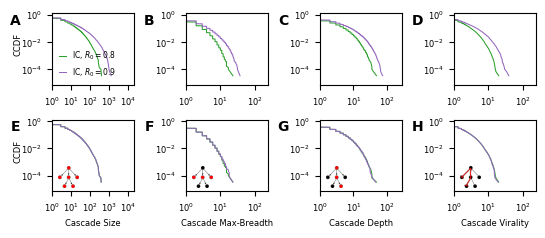

In [25]:
four_column_CCDF(full_IC_data,example_cascades_IC,keys=[0.8,0.9],plot_colors=['C2','C4'],model_name='IC',fig_name='Fig',destinations=destinations)

[0.98964636455385, 0.06639278673500393, 0.5671869564598773, 0.3116372831084474]
[0.02081521 5.42433372 1.1341326  2.33183064]


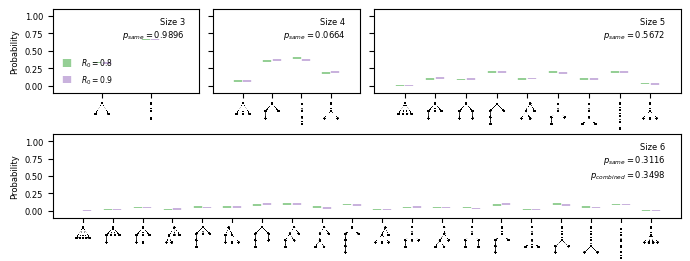

In [26]:
# Rooted trees...

# Count prevalence of rooted trees up to size 6 in False/True data set.
if (sample_many_times == True) :
    result_dic_IC = count_rooted_trees_general()
    destination='Outputs/'
    np.save(destination+'IC_RootedTrees_Rspread_MinimumCascadeSize1.npy',result_dic_IC)
    #np.save(destination+'SIR_ManuallyCountedStars.npy',stars_result_dic_SIR)
    
# PLOT small cascades
counted_cascades_IC = {0.8:{},0.9:{}}

destination='Outputs/'
counted_cascades_IC[0.8] = np.load('Outputs/ICRootedTrees_Rspread0.8_MinimumCascadeSize1.npy',allow_pickle=True).item()
counted_cascades_IC[0.9] = np.load('Outputs/ICRootedTrees_Rspread0.9_MinimumCascadeSize1.npy',allow_pickle=True).item()

plot_vecs_IC,p_combined_IC,p_arr_IC = rooted_trees_statistics(counted_cascades_IC,keys=[0.8,0.9])
rootedtrees_sharetick(plot_vecs_IC,keys=[0.8,0.9],colors=['C2','C4'],p_combined=p_combined_IC,p_arr=p_arr_IC,model_name='IC',destinations=destinations)

# Comparing IC and SIR cascades


 KS statistics :
----------------
size 
	minimum KS value: 1.0 
	95.0 percent of values above: 1.0 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
depth 
	minimum KS value: 9.791231544864622e-22 
	95.0 percent of values above: 9.550445970522272e-20 

	maximum KS value: 4.4001565060721195e-15 
	95.0 percent of values below: 6.486624780457736e-17
max_breadth 
	minimum KS value: 8.296975459487012e-36 
	95.0 percent of values above: 1.7102025876713498e-32 

	maximum KS value: 2.3463295378633525e-25 
	95.0 percent of values below: 5.237749667923619e-28
virality 
	minimum KS value: 4.8783857922102975e-08 
	95.0 percent of values above: 4.2039913729912945e-07 

	maximum KS value: 3.1321174454031964e-05 
	95.0 percent of values below: 6.654354760897151e-06

----------------
[  1  10 100]


/home/jlj/Dropbox/PhD/Structural_virality/Aral_method_test/definitions_clean_RR.py:5729: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


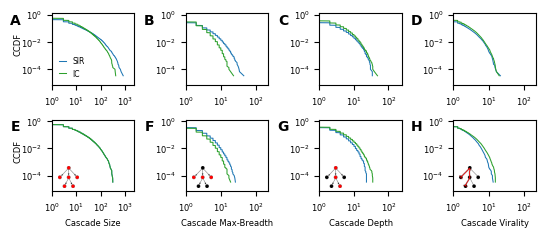

In [27]:
# First compare cascades created using R0 = 0.8
full_cascade_examplesICSIR08 = {'SIR':full_SIR_data[0.8],'IC':full_IC_data[0.8]}
#subsampled_cascade_examples = {'SIR':example_cascades_SIR[0.8],'IC':example_cascades_IC[0.8]}

cascade_data_ICSIR08 = {'SIR':cascade_data_SIR[0.8],'IC':cascade_data_IC[0.8]}
sample_many_times = False
if (sample_many_times == True) :
    sampled_pvalues_ICSIR08,example_cascades_ICSIR08=sample_topology(sample_N_times,cascade_data_ICSIR08,treatment_name='IC',control_name='SIR')
    
    # Save dicts...
    destination='Outputs/'
    np.save(destination+'ICSIR08_KSpvalues.npy',sampled_pvalues_ICSIR08)
    np.save(destination+'ICSIR08_ExampleCurves.npy',example_cascades_ICSIR08)

    
# load results if we already sampled many times...
destination='Outputs/'
sampled_pvalues_ICSIR08 = np.load(destination+'ICSIR08_KSpvalues.npy',allow_pickle = True).item()
example_cascades_ICSIR08 = np.load(destination+'ICSIR08_ExampleCurves.npy',allow_pickle = True).item()

# Examine the KS values
KS_minimum_and_quantile(sampled_pvalues_ICSIR08,features=['size','depth','max_breadth','virality'],quantile=0.05)



four_column_CCDF(full_cascade_examplesICSIR08,example_cascades_ICSIR08,keys=['SIR','IC'],plot_colors=['C0','C2'],model_name='ICSIR08',fig_name='Fig',destinations=destinations)


In [28]:
KS_make_table(cascade_data_ICSIR08,sampled_pvalues_ICSIR08,['size','depth','max_breadth','virality'],quantile=0.05)

\begin{table}

	\begin{tabular}{l c c c c c}\\ 

		 \hline
		 Quantity & $p$ (US) & $\min{p}$ (S)  & $\max{p}$ (S) & 95pct of $p$ above (S) & 95pct of $p$ below (S)\\ 
		 \hline
		 Size & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		 Depth & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\
		 Max-Breadth & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\
		 Virality & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\
		\hline
	\end{tabular}
	\caption{INSERT CAPTION \label{sup:tab:INSERT FIGNAME}}
\end{table}



 KS statistics :
----------------
size 
	minimum KS value: 1.0 
	95.0 percent of values above: 1.0 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
depth 
	minimum KS value: 8.859271221244501e-22 
	95.0 percent of values above: 2.0307312383048162e-19 

	maximum KS value: 8.570974070609191e-15 
	95.0 percent of values below: 1.6186238899972503e-16
max_breadth 
	minimum KS value: 1.3171332217959078e-38 
	95.0 percent of values above: 4.813299738957859e-34 

	maximum KS value: 2.1860784345548713e-27 
	95.0 percent of values below: 9.914266933921448e-30
virality 
	minimum KS value: 4.840945520059655e-10 
	95.0 percent of values above: 2.6676331822960606e-09 

	maximum KS value: 1.283132883476132e-07 
	95.0 percent of values below: 3.347668102798496e-08

----------------
[  1  10 100]


/home/jlj/Dropbox/PhD/Structural_virality/Aral_method_test/definitions_clean_RR.py:5729: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


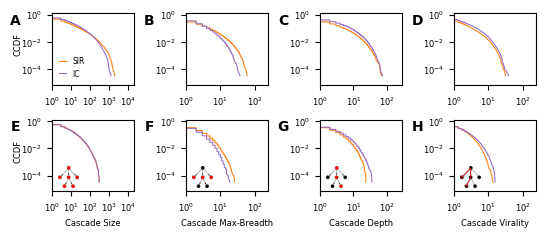

In [29]:
# Then compare cascades created using R0 = 0.9
full_cascade_examplesICSIR09 = {'SIR':full_SIR_data[0.9],'IC':full_IC_data[0.9]}
#subsampled_cascade_examples = {'SIR':example_cascades_SIR[0.8],'IC':example_cascades_IC[0.8]}

cascade_data_ICSIR09 = {'SIR':cascade_data_SIR[0.9],'IC':cascade_data_IC[0.9]}
sample_many_times = False
if (sample_many_times == True) :
    sampled_pvalues_ICSIR09,example_cascades_ICSIR09=sample_topology(sample_N_times,cascade_data_ICSIR09,treatment_name='IC',control_name='SIR')
    
    # Save dicts...
    destination='Outputs/'
    np.save(destination+'ICSIR09_KSpvalues.npy',sampled_pvalues_ICSIR09)
    np.save(destination+'ICSIR09_ExampleCurves.npy',example_cascades_ICSIR09)
    
# load results if we already sampled many times...
destination='Outputs/'
sampled_pvalues_ICSIR09 = np.load(destination+'ICSIR09_KSpvalues.npy',allow_pickle = True).item()
example_cascades_ICSIR09 = np.load(destination+'ICSIR09_ExampleCurves.npy',allow_pickle = True).item()

# Examine the KS values
KS_minimum_and_quantile(sampled_pvalues_ICSIR09,features=['size','depth','max_breadth','virality'],quantile=0.05)



four_column_CCDF(full_cascade_examplesICSIR09,example_cascades_ICSIR08,keys=['SIR','IC'],plot_colors=['C1','C4'],model_name='ICSIR09',fig_name='Fig',destinations=destinations)


In [30]:
KS_make_table(cascade_data_ICSIR09,sampled_pvalues_ICSIR09,['size','depth','max_breadth','virality'],quantile=0.05)

\begin{table}

	\begin{tabular}{l c c c c c}\\ 

		 \hline
		 Quantity & $p$ (US) & $\min{p}$ (S)  & $\max{p}$ (S) & 95pct of $p$ above (S) & 95pct of $p$ below (S)\\ 
		 \hline
		 Size & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		 Depth & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\
		 Max-Breadth & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\
		 Virality & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\
		\hline
	\end{tabular}
	\caption{INSERT CAPTION \label{sup:tab:INSERT FIGNAME}}
\end{table}


/home/jlj/Dropbox/PhD/Structural_virality/Aral_method_test/definitions_clean_RR.py:6697: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(h_pad = 0.0)


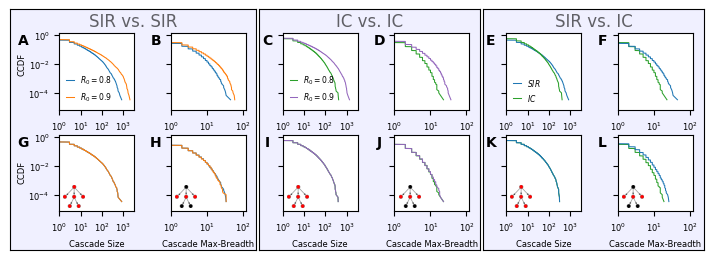

In [31]:
six_column_CCDF(example_cascades_SIR08only,example_cascades_SIR09only,example_cascades_IC08only,example_cascades_IC09only,example_cascades_SIR,example_cascades_IC,example_cascades_ICSIR08,destinations)

# On networks


In [32]:

cascades_networks = {}
cascades_sizes = {}
networks_files = {'Cornell':{0.35:'IC_data/Network_simulations/Cascades_on_network_ICMODELCornell5_Rspread0.350000_MinimumCascadeSize1.txt',
                                0.40:'IC_data/Network_simulations/Cascades_on_network_ICMODELCornell5_Rspread0.400000_MinimumCascadeSize1.txt'},
                 'athletes':{0.35:'IC_data/Network_simulations/Cascades_on_network_ICMODELathletes_edges_Rspread0.350000_MinimumCascadeSize1.txt',
                                0.40:'IC_data/Network_simulations/Cascades_on_network_ICMODELathletes_edges_Rspread0.400000_MinimumCascadeSize1.txt'}
                 
                 }
networks_files_measure = {'Cornell':{0.35:'IC_data/Network_simulations/Measures_Cascades_on_network_ICMODELCornell5_Rspread0.350000_MinimumCascadeSize1.txt',
                                0.40:'IC_data/Network_simulations/Measures_Cascades_on_network_ICMODELCornell5_Rspread0.400000_MinimumCascadeSize1.txt'},
                         'athletes':{0.35:'IC_data/Network_simulations/Measures_Cascades_on_network_ICMODELathletes_edges_Rspread0.350000_MinimumCascadeSize1.txt',
                                0.40:'IC_data/Network_simulations/Measures_Cascades_on_network_ICMODELathletes_edges_Rspread0.400000_MinimumCascadeSize1.txt'}
                         }
                  

cascades_networks,cascades_sizes=get_network_data(cascades_networks,cascades_sizes,networks_files,networks_files_measure,keys=[0.35,0.40],school='Cornell')
cascades_networks,cascades_sizes=get_network_data(cascades_networks,cascades_sizes,networks_files,networks_files_measure,keys=[0.35,0.40],school='athletes')

In [33]:
# Now sample... 

model = 'IC'

example_cascades_networks = {}
example_cascades_networks[model] = {}
#sampled_pvalues_IC_networks = {}
for school in ['Cornell','athletes'] :
    example_cascades_networks[model][school] = {'full':{}}
    for key in cascades_networks[school].keys() :
        _,example_cascades_networks[model][school]['full'][key]=sample_topology(1,cascades_networks[school],treatment_name=key,control_name=key)

if (sample_many_times == True) :
    for school in ['Cornell','athletes'] :
        example_cascades_networks[model][school] = {'subsampled':{}}

        
        keys = list(cascades_networks[school].keys())
        example_cascades_networks[model][school]['p-values'],example_cascades_networks[model][school]['subsampled']=sample_topology(sample_N_times,cascades_networks[school],treatment_name=keys[0],control_name=keys[1])
    
        # Save dicts...
        destination='Outputs/'
        np.save(destination+'%s_%s_KSpvalues.npy'%(school,model),example_cascades_networks[model][school]['p-values'])
        np.save(destination+'%s_%s_ExampleCurves.npy'%(school,model),example_cascades_networks[model][school]['subsampled'])

        
# load results if we already sampled many times...
for school in ['Cornell','athletes'] :
    destination='Outputs/'
    example_cascades_networks[model][school]['p-values'] = np.load(destination+'%s_%s_KSpvalues.npy'%(school,model),allow_pickle = True).item()
    example_cascades_networks[model][school]['subsampled'] = np.load(destination+'%s_%s_ExampleCurves.npy'%(school,model),allow_pickle = True).item()

    # Examine the KS values
    KS_minimum_and_quantile(example_cascades_networks[model][school]['p-values'],features=['size','depth','max_breadth','virality'],quantile=0.05)



Doing experiment 0 out of 1
Doing experiment 0 out of 1
Doing experiment 0 out of 1
Doing experiment 0 out of 1

 KS statistics :
----------------
size 
	minimum KS value: 1.0 
	95.0 percent of values above: 1.0 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
depth 
	minimum KS value: 0.998133564607282 
	95.0 percent of values above: 0.9999999996109802 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
max_breadth 
	minimum KS value: 0.9959772899360063 
	95.0 percent of values above: 0.9999999815086086 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
virality 
	minimum KS value: 0.9999927816547227 
	95.0 percent of values above: 0.9999999996109802 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0

----------------

 KS statistics :
----------------
size 
	minimum KS value: 1.0 
	95.0 percent of values above: 1.0 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
depth 
	minimum KS value: 0.9996732453148728 
	95.0 percent of values


 KS statistics :
----------------
size 
	minimum KS value: 1.0 
	95.0 percent of values above: 1.0 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
depth 
	minimum KS value: 0.998133564607282 
	95.0 percent of values above: 0.9999999996109802 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
max_breadth 
	minimum KS value: 0.9959772899360063 
	95.0 percent of values above: 0.9999999815086086 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
virality 
	minimum KS value: 0.9999927816547227 
	95.0 percent of values above: 0.9999999996109802 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0

----------------
[  1  10 100]


/home/jlj/Dropbox/PhD/Structural_virality/Aral_method_test/definitions_clean_RR.py:5729: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



 KS statistics :
----------------
size 
	minimum KS value: 1.0 
	95.0 percent of values above: 1.0 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
depth 
	minimum KS value: 0.9996732453148728 
	95.0 percent of values above: 0.9999999998595023 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
max_breadth 
	minimum KS value: 0.9996732453148728 
	95.0 percent of values above: 0.9999999998595023 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
virality 
	minimum KS value: 0.9998727451217517 
	95.0 percent of values above: 0.9999999964235664 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0

----------------
[  1  10 100]


/home/jlj/Dropbox/PhD/Structural_virality/Aral_method_test/definitions_clean_RR.py:5729: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


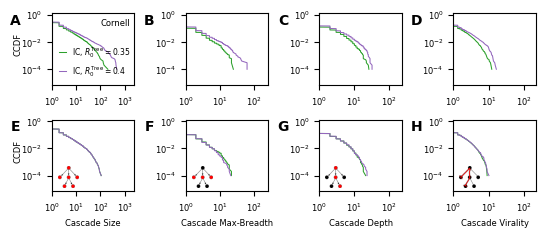

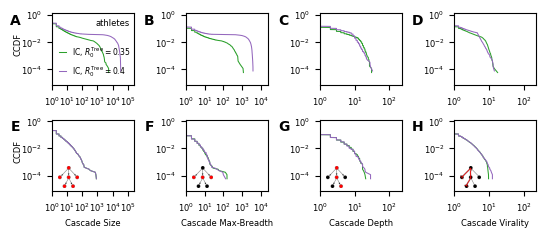

In [34]:
for school in ['Cornell','athletes'] :
    destination='Outputs/'
    example_cascades_networks[model][school]['p-values'] = np.load(destination+'%s_%s_KSpvalues.npy'%(school,model),allow_pickle = True).item()
    example_cascades_networks[model][school]['subsampled'] = np.load(destination+'%s_%s_ExampleCurves.npy'%(school,model),allow_pickle = True).item()

    example_cascades_networks[model][school]['subsampled'][0.35] = example_cascades_networks[model][school]['subsampled'][0.35]
    example_cascades_networks[model][school]['subsampled'][0.40] = example_cascades_networks[model][school]['subsampled'][0.40]
    
    # Examine the KS values
    KS_minimum_and_quantile(example_cascades_networks[model][school]['p-values'],features=['size','depth','max_breadth','virality'],quantile=0.05)
    four_column_CCDF({0.35:example_cascades_networks[model][school]['full'][0.35][0.35],0.40:example_cascades_networks[model][school]['full'][0.40][0.40]},example_cascades_networks[model][school]['subsampled'],keys=[0.35,0.40],plot_colors=['C2','C4'],model_name='IC',fig_name='Fignetwork_%s'%school,destinations=destinations,school=school)


In [35]:
for school in ['Cornell','athletes'] :
    print("IC on %s network TABLE"%school)
    print("-----------------------\n\n")    
    KS_make_table(cascades_networks[school],example_cascades_networks['IC'][school]['p-values'],['size','depth','max_breadth','virality'],quantile=0.05)

IC on Cornell network TABLE
-----------------------


\begin{table}

	\begin{tabular}{l c c c c c}\\ 

		 \hline
		 Quantity & $p$ (US) & $\min{p}$ (S)  & $\max{p}$ (S) & 95pct of $p$ above (S) & 95pct of $p$ below (S)\\ 
		 \hline
		 Size & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		 Depth & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		 Max-Breadth & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		 Virality & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		\hline
	\end{tabular}
	\caption{INSERT CAPTION \label{sup:tab:INSERT FIGNAME}}
\end{table}
IC on athletes network TABLE
-----------------------


\begin{table}

	\begin{tabular}{l c c c c c}\\ 

		 \hline
		 Quantity & $p$ (US) & $\min{p}$ (S)  & $\max{p}$ (S) & 95pct of $p$ above (S) & 95pct of $p$ below (S)\\ 
		 \hline
		 Size & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		 Depth & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		 Max-Breadth & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		 Virality & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		\hline
	\end{tabular}
	\caption{INSERT CAPTION \

In [36]:

cascades_networks = {}
cascades_sizes = {}
networks_files = {'Cornell':{0.55:'SIR_data/Network_simulations/Cascades_on_networkCornell5_Rspread0.550000_MinimumCascadeSize1.txt',
                                0.65:'SIR_data/Network_simulations/Cascades_on_networkCornell5_Rspread0.650000_MinimumCascadeSize1.txt'},
                 'athletes':{0.55:'SIR_data/Network_simulations/Cascades_on_networkathletes_edges_Rspread0.550000_MinimumCascadeSize1.txt',
                                0.65:'SIR_data/Network_simulations/Cascades_on_networkathletes_edges_Rspread0.650000_MinimumCascadeSize1.txt'}
                 
                 }
networks_files_measure = {'Cornell':{0.55:'SIR_data/Network_simulations/Measures_Cascades_on_networkCornell5_Rspread0.550000_MinimumCascadeSize1.txt',
                                0.65:'SIR_data/Network_simulations/Measures_Cascades_on_networkCornell5_Rspread0.650000_MinimumCascadeSize1.txt'},
                         'athletes':{0.55:'SIR_data/Network_simulations/Measures_Cascades_on_networkathletes_edges_Rspread0.550000_MinimumCascadeSize1.txt',
                                0.65:'SIR_data/Network_simulations/Measures_Cascades_on_networkathletes_edges_Rspread0.650000_MinimumCascadeSize1.txt'}
                         }
                  

cascades_networks,cascades_sizes=get_network_data(cascades_networks,cascades_sizes,networks_files,networks_files_measure,keys=[0.55,0.65],school='Cornell')
cascades_networks,cascades_sizes=get_network_data(cascades_networks,cascades_sizes,networks_files,networks_files_measure,keys=[0.55,0.65],school='athletes')

In [37]:
# Now sample... 

model = 'SIR'

example_cascades_networks = {}
example_cascades_networks[model] = {}
#sampled_pvalues_IC_networks = {}
for school in ['Cornell','athletes'] :
    if (school not in example_cascades_networks[model].keys()) :
        example_cascades_networks[model][school] = {}
    example_cascades_networks[model][school]['full'] = {}
    for key in cascades_networks[school].keys() :
        _,example_cascades_networks[model][school]['full'][key]=sample_topology(1,cascades_networks[school],treatment_name=key,control_name=key)
sample_many_times = False
if (sample_many_times == True) :
    for school in ['Cornell','athletes'] :
        example_cascades_networks[model][school]['subsampled']={}

        
        keys = list(cascades_networks[school].keys())
        example_cascades_networks[model][school]['p-values'],example_cascades_networks[model][school]['subsampled']=sample_topology(sample_N_times,cascades_networks[school],treatment_name=keys[0],control_name=keys[1])
    
        # Save dicts...
        destination='Outputs/'
        np.save(destination+'%s_%s_KSpvalues.npy'%(school,model),example_cascades_networks[model][school]['p-values'])
        np.save(destination+'%s_%s_ExampleCurves.npy'%(school,model),example_cascades_networks[model][school]['subsampled'])
sample_many_times = False
# load results if we already sampled many times...
for school in ['Cornell','athletes'] :
    destination='Outputs/'
    example_cascades_networks[model][school]['p-values'] = np.load(destination+'%s_%s_KSpvalues.npy'%(school,model),allow_pickle = True).item()
    example_cascades_networks[model][school]['subsampled'] = np.load(destination+'%s_%s_ExampleCurves.npy'%(school,model),allow_pickle = True).item()

    # Examine the KS values
    KS_minimum_and_quantile(example_cascades_networks[model][school]['p-values'],features=['size','depth','max_breadth','virality'],quantile=0.05)



Doing experiment 0 out of 1
Doing experiment 0 out of 1
Doing experiment 0 out of 1
Doing experiment 0 out of 1

 KS statistics :
----------------
size 
	minimum KS value: 1.0 
	95.0 percent of values above: 1.0 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
depth 
	minimum KS value: 0.8814006347449281 
	95.0 percent of values above: 0.9984904766727641 

	maximum KS value: 1.0 
	95.0 percent of values below: 0.9999999999999999
max_breadth 
	minimum KS value: 0.7309442267217465 
	95.0 percent of values above: 0.9540890605515878 

	maximum KS value: 1.0 
	95.0 percent of values below: 0.9999999851919316
virality 
	minimum KS value: 0.9965792747097683 
	95.0 percent of values above: 0.9999982932212885 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0

----------------

 KS statistics :
----------------
size 
	minimum KS value: 1.0 
	95.0 percent of values above: 1.0 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
depth 
	minimum KS value: 0.9614599410


 KS statistics :
----------------
size 
	minimum KS value: 1.0 
	95.0 percent of values above: 1.0 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
depth 
	minimum KS value: 0.8814006347449281 
	95.0 percent of values above: 0.9984904766727641 

	maximum KS value: 1.0 
	95.0 percent of values below: 0.9999999999999999
max_breadth 
	minimum KS value: 0.7309442267217465 
	95.0 percent of values above: 0.9540890605515878 

	maximum KS value: 1.0 
	95.0 percent of values below: 0.9999999851919316
virality 
	minimum KS value: 0.9965792747097683 
	95.0 percent of values above: 0.9999982932212885 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0

----------------
[  1  10 100]


/home/jlj/Dropbox/PhD/Structural_virality/Aral_method_test/definitions_clean_RR.py:5729: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



 KS statistics :
----------------
size 
	minimum KS value: 1.0 
	95.0 percent of values above: 1.0 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
depth 
	minimum KS value: 0.9614599410364156 
	95.0 percent of values above: 0.9999764528825595 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
max_breadth 
	minimum KS value: 0.9384629993268137 
	95.0 percent of values above: 0.9999933052818322 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
virality 
	minimum KS value: 0.9999764528825595 
	95.0 percent of values above: 0.9999999999999531 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0

----------------
[  1  10 100]


/home/jlj/Dropbox/PhD/Structural_virality/Aral_method_test/definitions_clean_RR.py:5729: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


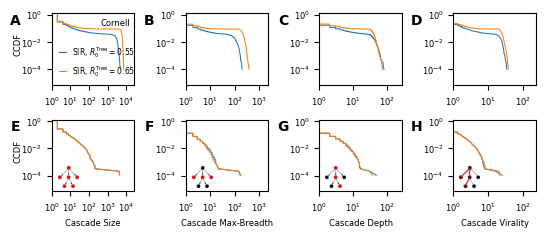

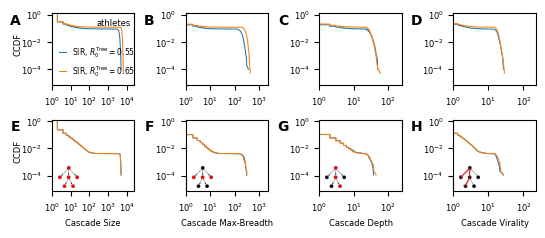

In [38]:
for school in ['Cornell','athletes'] :
    destination='Outputs/'
    example_cascades_networks[model][school]['p-values'] = np.load(destination+'%s_%s_KSpvalues.npy'%(school,model),allow_pickle = True).item()
    example_cascades_networks[model][school]['subsampled'] = np.load(destination+'%s_%s_ExampleCurves.npy'%(school,model),allow_pickle = True).item()

    example_cascades_networks[model][school]['subsampled'][0.55] = example_cascades_networks[model][school]['subsampled'][0.55]
    example_cascades_networks[model][school]['subsampled'][0.65] = example_cascades_networks[model][school]['subsampled'][0.65]
    
    # Examine the KS values
    KS_minimum_and_quantile(example_cascades_networks[model][school]['p-values'],features=['size','depth','max_breadth','virality'],quantile=0.05)
    four_column_CCDF({0.55:example_cascades_networks[model][school]['full'][0.55][0.55],0.65:example_cascades_networks[model][school]['full'][0.65][0.65]},example_cascades_networks[model][school]['subsampled'],keys=[0.55,0.65],plot_colors=['C0','C1'],model_name='SIR',fig_name='Fignetwork_%s'%school,destinations=destinations,school=school)


In [39]:
for school in ['Cornell','athletes'] :
    print("SIR on %s network TABLE"%school)
    print("-----------------------\n\n")
    KS_make_table(cascades_networks[school],example_cascades_networks['SIR'][school]['p-values'],['size','depth','max_breadth','virality'],quantile=0.05)

SIR on Cornell network TABLE
-----------------------


\begin{table}

	\begin{tabular}{l c c c c c}\\ 

		 \hline
		 Quantity & $p$ (US) & $\min{p}$ (S)  & $\max{p}$ (S) & 95pct of $p$ above (S) & 95pct of $p$ below (S)\\ 
		 \hline
		 Size & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		 Depth & 0.00 & 0.88 & 1.00 & 1.00 & 1.00 \\
		 Max-Breadth & 0.00 & 0.73 & 1.00 & 0.95 & 1.00 \\
		 Virality & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		\hline
	\end{tabular}
	\caption{INSERT CAPTION \label{sup:tab:INSERT FIGNAME}}
\end{table}
SIR on athletes network TABLE
-----------------------


\begin{table}

	\begin{tabular}{l c c c c c}\\ 

		 \hline
		 Quantity & $p$ (US) & $\min{p}$ (S)  & $\max{p}$ (S) & 95pct of $p$ above (S) & 95pct of $p$ below (S)\\ 
		 \hline
		 Size & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		 Depth & 0.00 & 0.96 & 1.00 & 1.00 & 1.00 \\
		 Max-Breadth & 0.00 & 0.94 & 1.00 & 1.00 & 1.00 \\
		 Virality & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		\hline
	\end{tabular}
	\caption{INSERT CAPTION

## Plot data from Goel et al. (2015)


In [40]:
# Import data.
Goelpath = 'data-Goel/cascades_last_parent.tsv'
df_Goel = pd.read_csv(Goelpath,delimiter='\t',header=None)
# Rename
df_Goel = df_Goel.rename(columns={0: "url", 
                        1: "root",
                        2:"size",
                        3:"max.depth",
                        4:"avg.depth",
                        5:"avg.dist",
                        6:"prob.diff.parent",
                        7:"max.broadcast",
                        8:"num_official_rt",
                        9:"avg_num_potential_parents",
                        10:"avg_parent_position"})

# Define domains....
domains = {
    'news':["bbc.co.uk","cnn.com","forbes.com","nytimes.com","online.wsj.com","guardian.co.uk","huffingtonpost.com","news.yahoo.com","usatoday.com","telegraph.co.uk","msnbc.msn.com"],
    'videos':["youtube.com","m.youtube.com","youtu.be","vimeo.com","livestream.com","twitcam.livestream.com","ustream.tv","twitvid.com","mtv.com","vh1.com"],
    'pictures':["twitpic.com","instagr.am","instagram.com","yfrog.com","p.twimg.com","twimg.com","i.imgur.com","imgur.com","img.ly","flickr.com"],
    'petitions':["change.org","twitition.com","kickstarter.com"]
    }

# Get domain dataset.
Goel_data = {
    'news':{},
    'videos':{},
    'pictures':{},
    'petitions':{}
    }

Goel_topology = {
    'news':{'size':[],'max.depth':[],'max.broadcast':[],'avg.dist':[]},
    'videos':{'size':[],'max.depth':[],'max.broadcast':[],'avg.dist':[]},
    'pictures':{'size':[],'max.depth':[],'max.broadcast':[],'avg.dist':[]},
    'petitions':{'size':[],'max.depth':[],'max.broadcast':[],'avg.dist':[]}
    }



domain_not_found = []
Goel_cascade_numbers = {
    'news':0,
    'videos':0,
    'pictures':0,
    'petitions':0
    }


news_cascade_numbers_all = {
    "bbc.co.uk":0,
    "cnn.com":0,
    "forbes.com":0,
    "nytimes.com":0,
    "online.wsj.com":0,
    "guardian.co.uk":0,
    "huffingtonpost.com":0,
    "news.yahoo.com":0,
    "usatoday.com":0,
    "telegraph.co.uk":0,
    "msnbc.msn.com":0
    }

news_data = {
    "bbc.co.uk":{},
    "nytimes.com":{},
    "guardian.co.uk":{},
    "huffingtonpost.com":{}
    }
news_topology = {
    'bbc.co.uk':{'size':[],'max.depth':[],'max.broadcast':[],'avg.dist':[]},
    'nytimes.com':{'size':[],'max.depth':[],'max.broadcast':[],'avg.dist':[]},
    'guardian.co.uk':{'size':[],'max.depth':[],'max.broadcast':[],'avg.dist':[]},
    'huffingtonpost.com':{'size':[],'max.depth':[],'max.broadcast':[],'avg.dist':[]}    
    }
news_cascade_numbers = {
    "bbc.co.uk":0,
    "nytimes.com":0,
    "guardian.co.uk":0,
    "huffingtonpost.com":0
    }

UKwebsites = ["bbc.co.uk","guardian.co.uk"]
USwebsites = ["nytimes.com", "huffingtonpost.com"]

news_data_UKvsUS = {
    'US':{},
    'UK':{}
    }

image_data = {
    "instagram.com":{},
    "twitpic.com":{}
    }
image_topology = {
    'instagram.com':{'size':[],'max.depth':[],'max.broadcast':[],'avg.dist':[]},
    'twitpic.com':{'size':[],'max.depth':[],'max.broadcast':[],'avg.dist':[]}
    }
image_cascade_numbers = {
    "instagram.com":0,
    "twitpic.com":0
    }


for cascade_num in range (len(df_Goel['url'])) :
    website = df_Goel['url'][cascade_num].split('/')[0]
    this_size = df_Goel['size'][cascade_num]
    for domain in domains.keys() :
        if (website in domains[domain]) :
            
            # Save all data into dic
            if (this_size not in Goel_data[domain].keys()) :
                Goel_data[domain][this_size] = {}
                
            if (website in news_data.keys() and this_size not in news_data[website].keys()) :
                news_data[website][this_size] = {}
                
                # US vs UK
                if (website in UKwebsites and this_size not in news_data_UKvsUS['UK'].keys()) :
                    news_data_UKvsUS['UK'][this_size] = {}
                if (website in USwebsites and this_size not in news_data_UKvsUS['US'].keys()) :
                    news_data_UKvsUS['US'][this_size] = {}

                
            if (website in image_data.keys() and this_size not in image_data[website].keys()) :
                image_data[website][this_size] = {}                    
                    
                    
            Goel_data[domain][this_size][len(Goel_data[domain][this_size].keys())] = {}
            
            if (website in news_data.keys()) :
                news_data[website][this_size][len(news_data[website][this_size].keys())] = {}
                
            if (website in UKwebsites) :
                news_data_UKvsUS['UK'][this_size][len(news_data_UKvsUS['UK'][this_size].keys())] = {}                
            elif (website in USwebsites) :
                news_data_UKvsUS['US'][this_size][len(news_data_UKvsUS['US'][this_size].keys())] = {}                
            
            if (website in image_data.keys()) :
                image_data[website][this_size][len(image_data[website][this_size].keys())] = {}                
            
            for column in df_Goel.keys() :
                Goel_data[domain][this_size][len(Goel_data[domain][this_size].keys())-1][column] = df_Goel[column][cascade_num]
                
                # Save specified topological information into plot-array
                if (column == 'size') :
                    Goel_topology[domain]['size'].append(df_Goel[column][cascade_num])
                if (column == 'max.depth') :
                    Goel_topology[domain]['max.depth'].append(df_Goel[column][cascade_num])
                if (column == 'avg.dist') :
                    Goel_topology[domain]['avg.dist'].append(df_Goel[column][cascade_num])
                if (column == 'max.broadcast') :
                    Goel_topology[domain]['max.broadcast'].append(df_Goel[column][cascade_num])
                    
                if (website in news_data.keys()) :
                    news_data[website][this_size][len(news_data[website][this_size].keys())-1][column] = df_Goel[column][cascade_num]

                    # Save specified topological information into plot-array
                    if (column == 'size') :
                        news_topology[website]['size'].append(df_Goel[column][cascade_num])
                    if (column == 'max.depth') :
                        news_topology[website]['max.depth'].append(df_Goel[column][cascade_num])
                    if (column == 'avg.dist') :
                        news_topology[website]['avg.dist'].append(df_Goel[column][cascade_num])                    
                    if (column == 'max.broadcast') :
                        news_topology[website]['max.broadcast'].append(df_Goel[column][cascade_num])                      

                    if (website in UKwebsites) :
                        news_data_UKvsUS['UK'][this_size][len(news_data_UKvsUS['UK'][this_size].keys())-1][column] = df_Goel[column][cascade_num]
                        
                    if (website in USwebsites) :
                        news_data_UKvsUS['US'][this_size][len(news_data_UKvsUS['US'][this_size].keys())-1][column] = df_Goel[column][cascade_num]
                        
                        
                        
                if (website in image_data.keys()) :
                    image_data[website][this_size][len(image_data[website][this_size].keys())-1][column] = df_Goel[column][cascade_num]

                    # Save specified topological information into plot-array
                    if (column == 'size') :
                        image_topology[website]['size'].append(df_Goel[column][cascade_num])
                    if (column == 'max.depth') :
                        image_topology[website]['max.depth'].append(df_Goel[column][cascade_num])
                    if (column == 'avg.dist') :
                        image_topology[website]['avg.dist'].append(df_Goel[column][cascade_num])                    
                    if (column == 'max.broadcast') :
                        image_topology[website]['max.broadcast'].append(df_Goel[column][cascade_num])                      

                                                     
                        
                                        
                    
            if (domain == 'news') :
                news_cascade_numbers_all[website] +=1
                
            #print(domain)
            break
        elif (domain == 'petitions') :
            domain_not_found.append(website)
            
domain_not_found = np.unique(domain_not_found)
print(domain_not_found)
        
        



['buzzfeed.com' 'theoatmeal.com' 'xkcd.com']


In [41]:
news_topology_UKvsUS = {'US':{'size':[],'max.depth':[],'max.broadcast':[],'avg.dist':[]},
                        'UK':{'size':[],'max.depth':[],'max.broadcast':[],'avg.dist':[]}}


for UKwebsite in UKwebsites :
    for cascadenum in range (len(news_topology[UKwebsite]['size'])) :
        for measure in news_topology_UKvsUS['UK'].keys() :

            news_topology_UKvsUS['UK'][measure].append(news_topology[UKwebsite][measure][cascadenum])
            
for USwebsite in USwebsites :
    for cascadenum in range (len(news_topology[USwebsite]['size'])) :
        for measure in news_topology_UKvsUS['US'].keys() :
            news_topology_UKvsUS['US'][measure].append(news_topology[USwebsite][measure][cascadenum])


In [42]:
print("GOEL DATA")
for domain in Goel_data.keys() :
    number_of_cascades_in_domain = 0
    for size in Goel_data[domain].keys() :
        number_of_cascades_in_domain += len(Goel_data[domain][size].keys())
    print("Number of cascades in ",domain,number_of_cascades_in_domain)
    
print("NEWS -- GOEL DATA")
total_news = 0
for website in news_cascade_numbers_all.keys() :
    print("Number of cascades",website,":",news_cascade_numbers_all[website])
    total_news +=news_cascade_numbers_all[website]
    
print("Total number of news items",total_news)


GOEL DATA
Number of cascades in  news 25095
Number of cascades in  videos 76096
Number of cascades in  pictures 120583
Number of cascades in  petitions 1615
NEWS -- GOEL DATA
Number of cascades bbc.co.uk : 4556
Number of cascades cnn.com : 1644
Number of cascades forbes.com : 1251
Number of cascades nytimes.com : 5586
Number of cascades online.wsj.com : 1064
Number of cascades guardian.co.uk : 4424
Number of cascades huffingtonpost.com : 5264
Number of cascades news.yahoo.com : 214
Number of cascades usatoday.com : 173
Number of cascades telegraph.co.uk : 476
Number of cascades msnbc.msn.com : 443
Total number of news items 25095


In [43]:
Goel_data_samesizes = {}
d = [list(Goel_data['news'].keys()),
    list(Goel_data['pictures'].keys()),
    list(Goel_data['videos'].keys()),
    list(Goel_data['petitions'].keys())]  
sizes = set.intersection(*[set(x) for x in d])  

Goel_data_samesizes = copy.deepcopy(Goel_data)

for domain in Goel_data_samesizes.keys() :
    sizelist = list(Goel_data_samesizes[domain].keys())
    for size in sizelist :
        if (size not in sizes) : 
            del Goel_data_samesizes[domain][size]


# News...
news_data_samesizes = {}
d = [list(news_data['bbc.co.uk'].keys()),
    list(news_data['nytimes.com'].keys()),
    list(news_data['guardian.co.uk'].keys()),
    list(news_data['huffingtonpost.com'].keys())]  
sizes = set.intersection(*[set(x) for x in d])  

news_data_samesizes = copy.deepcopy(news_data)

for domain in news_data_samesizes.keys() :
    sizelist = list(news_data_samesizes[domain].keys())
    for size in sizelist :
        if (size not in sizes) : 
            del news_data_samesizes[domain][size]


            
# News UK vs US...
news_data_UKvsUS_samesizes = {}
d = [list(news_data_UKvsUS['UK'].keys()),
    list(news_data_UKvsUS['US'].keys())]

sizes = set.intersection(*[set(x) for x in d])  

news_data_UKvsUS_samesizes = copy.deepcopy(news_data_UKvsUS)

for domain in news_data_UKvsUS_samesizes.keys() :
    sizelist = list(news_data_UKvsUS_samesizes[domain].keys())
    for size in sizelist :
        if (size not in sizes) : 
            del news_data_UKvsUS_samesizes[domain][size]            
            
# Images...
image_data_samesizes = {}
d = [list(image_data['instagram.com'].keys()),
    list(image_data['twitpic.com'].keys())
    ]

sizes = set.intersection(*[set(x) for x in d])  

image_data_samesizes = copy.deepcopy(image_data)

for domain in image_data_samesizes.keys() :
    sizelist = list(image_data_samesizes[domain].keys())
    for size in sizelist :
        if (size not in sizes) : 
            del image_data_samesizes[domain][size]

In [44]:
# Now sample... 


# GOEL
# --------

sample_many_times = False

Goel_example_cascades = {}
if (sample_many_times == True) :
    pGoelvid,Goel_example_cascades_temp=sample_topology(10000,Goel_data_samesizes,treatment_name='news',variables=['size','max.depth','max.broadcast','avg.dist'],control_name='videos')
    '''        example_cascades_networks[model][school]['p-values'],example_cascades_networks[model][school]['subsampled']=sample_topology(sample_N_times,cascades_networks[school],treatment_name=keys[0],control_name=keys[1])

            # Save dicts...
            destination='Outputs/'
            np.save(destination+'%s_%s_KSpvalues.npy'%(school,model),example_cascades_networks[model][school]['p-values'])
            np.save(destination+'%s_%s_ExampleCurves.npy'%(school,model),example_cascades_networks[model][school]['subsampled'])
    '''
    Goel_example_cascades['news'] = Goel_example_cascades_temp['news']
    Goel_example_cascades['videos'] = Goel_example_cascades_temp['videos']

    pGoelpictures,Goel_example_cascades_temp=sample_topology(10000,Goel_data_samesizes,treatment_name='news',variables=['size','max.depth','max.broadcast','avg.dist'],control_name='pictures')

    Goel_example_cascades['pictures'] = Goel_example_cascades_temp['pictures']


    pGoelpetitions,Goel_example_cascades_temp=sample_topology(10000,Goel_data_samesizes,treatment_name='news',variables=['size','max.depth','max.broadcast','avg.dist'],control_name='petitions')

    Goel_example_cascades['petitions'] = Goel_example_cascades_temp['petitions']



# news
# ---------

        
sample_many_times = False

news_example_cascades = {}

_,news_example_cascades_temp=sample_topology(1,news_data_samesizes,treatment_name='guardian.co.uk',variables=['size','max.depth','max.broadcast','avg.dist'],control_name='bbc.co.uk')

news_example_cascades['guardian.co.uk'] = news_example_cascades_temp['guardian.co.uk']
news_example_cascades['bbc.co.uk'] = news_example_cascades_temp['bbc.co.uk']

_,news_example_cascades_temp=sample_topology(1,news_data_samesizes,treatment_name='guardian.co.uk',variables=['size','max.depth','max.broadcast','avg.dist'],control_name='nytimes.com')

news_example_cascades['nytimes.com'] = news_example_cascades_temp['nytimes.com']


_,news_example_cascades_temp=sample_topology(1,news_data_samesizes,treatment_name='guardian.co.uk',variables=['size','max.depth','max.broadcast','avg.dist'],control_name='huffingtonpost.com')

news_example_cascades['huffingtonpost.com'] = news_example_cascades_temp['huffingtonpost.com']






# news UKvsUS
# ---------

        
sample_many_times = False

news_UKvsUS_example_cascades = {}

_,news_UKvsUS_example_cascades=sample_topology(1,news_data_UKvsUS_samesizes,treatment_name='UK',variables=['size','max.depth','max.broadcast','avg.dist'],control_name='US')
#
#news_UKvsUS_example_cascades['guardian.co.uk'] = news_UKvsUS_example_cascades_temp['guardian.co.uk']
#news_UKvsUS_example_cascades['bbc.co.uk'] = news_UKvsUS_example_cascades_temp['bbc.co.uk']
#
#_,news_UKvsUS_example_cascades_temp=sample_topology(1,news_data_UKvsUS_samesizes,treatment_name='guardian.co.uk',variables=['size','max.depth','avg.dist'],control_name='nytimes.com')

#news_UKvsUS_example_cascades['nytimes.com'] = news_UKvsUS_example_cascades_temp['nytimes.com']


#_,news_UKvsUS_example_cascades_temp=sample_topology(1,news_data_UKvsUS_samesizes,treatment_name='guardian.co.uk',variables=['size','max.depth','avg.dist'],control_name='huffingtonpost.com')

#news_UKvsUS_example_cascades['huffingtonpost.com'] = news_UKvsUS_example_cascades_temp['huffingtonpost.com']






# image
# ---------

        
sample_many_times = False

image_example_cascades = {}

_,image_example_cascades_temp=sample_topology(1,image_data_samesizes,treatment_name='instagram.com',variables=['size','max.depth','max.broadcast','avg.dist'],control_name='twitpic.com')

image_example_cascades['instagram.com'] = image_example_cascades_temp['instagram.com']
image_example_cascades['twitpic.com'] = image_example_cascades_temp['twitpic.com']




Doing experiment 0 out of 1
Doing experiment 0 out of 1
Doing experiment 0 out of 1
Doing experiment 0 out of 1
Doing experiment 0 out of 1


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
print("Do logistic regression many times. This is very time consuming")
if (sample_many_times == True) :


    warnings.filterwarnings("ignore", category=DeprecationWarning)

    cascade_data_logistic = {'videos':{},'pictures':{},'petitions':{},'news':{}}

    for category in cascade_data_logistic.keys() :
        cascade_data_logistic[category] = {'max.depth':[],
                        'avg.dist':[],
                         'size':[],
                         'veracity-true':[]
                        }

    category_vec = list(cascade_data_logistic.keys())    
    category_values = {'videos':0,'pictures':1,'petitions':2,'news':3}


    for veracity in category_vec :
        for size in cascade_data[veracity].keys() :
            for cascade_id in cascade_data[veracity][size].keys() :
                for category in cascade_data_logistic['videos'].keys() :
                    if (category == 'veracity-true') :

                        var = category_values[veracity]

                        for id_double in range (20) :

                            cascade_data_logistic[veracity][category].append(var)
                    else :
                        for id_double in range(20):
                            cascade_data_logistic[veracity][category].append(float(cascade_data[veracity][size][cascade_id][category]))



    accuracy_original = []

    print("Check actual size...")
    Nids = 22653            


    feature_importance = [[],[],[]]


    rx = []
    for exp in range (1000) :
        random_videos_arr = np.concatenate((np.ones((Nids)),np.zeros((len(cascade_data_logistic['videos']['max.depth'])-Nids))))
        random_pictures_arr = np.concatenate((np.ones((Nids)),np.zeros((len(cascade_data_logistic['pictures']['max.depth'])-Nids))))
        random_petitions_arr = np.concatenate((np.ones((Nids)),np.zeros((len(cascade_data_logistic['petitions']['max.depth'])-Nids))))

        random_news_arr = np.concatenate((np.ones((Nids)),np.zeros((len(cascade_data_logistic['news']['max.depth'])-Nids))))

        if (exp//100==exp/100) :
            print(exp)    

        rt = copy.copy(random_videos_arr)
        random.shuffle(random_pictures_arr)
        random.shuffle(random_petitions_arr)    
        random.shuffle(random_news_arr)


        logistic_data = {'max.depth':np.array([]),
                        'avg.dist':np.array([]),
                         'size':np.array([]),
                         'veracity-true':np.array([])
                        }

        for category in logistic_data.keys():
            if (len(logistic_data[category]) == 0) :
                logistic_data[category] = np.array(cascade_data_logistic['videos'][category])[copy.copy(random_videos_arr).astype(bool)].astype(int)
                logistic_data[category] = np.concatenate((logistic_data[category].astype(int),np.array(cascade_data_logistic['pictures'][category]).astype(int)[copy.copy(random_pictures_arr).astype(bool)]))
                logistic_data[category] = np.concatenate((logistic_data[category].astype(int),np.array(cascade_data_logistic['petitions'][category]).astype(int)[copy.copy(random_petitions_arr).astype(bool)]))
                logistic_data[category] = np.concatenate((logistic_data[category].astype(int),np.array(cascade_data_logistic['news'][category]).astype(int)[copy.copy(random_news_arr).astype(bool)]))


            else : 
                logistic_data[category] = np.concatenate((logistic_data[category].astype(int),np.array(cascade_data_logistic['videos'][category]).astype(int)[copy.copy(random_videos_arr).astype(bool)]))            
                logistic_data[category] = np.concatenate((logistic_data[category].astype(int),np.array(cascade_data_logistic['pictures'][category]).astype(int)[copy.copy(random_pictures_arr).astype(bool)]))
                logistic_data[category] = np.concatenate((logistic_data[category].astype(int),np.array(cascade_data_logistic['petitions'][category]).astype(int)[copy.copy(random_petitions_arr).astype(bool)]))
                logistic_data[category] = np.concatenate((logistic_data[category].astype(int),np.array(cascade_data_logistic['news'][category]).astype(int)[copy.copy(random_news_arr).astype(bool)]))


        logistic_df = pd.DataFrame(copy.copy(logistic_data),columns= ['max.depth','avg.dist','size','veracity-true'])

        X = copy.copy(logistic_df[['max.depth','avg.dist','size']])
        y = copy.copy(logistic_df['veracity-true'])

        rx = copy.copy(X['avg.dist'])

        X_train,X_test,y_train,y_test = copy.copy(train_test_split(X,y,test_size=0.25,random_state=0))
        random.seed(a=None)

        logistic_regression= LogisticRegression()
        logistic_regression.fit(X_train,y_train)
        y_pred=logistic_regression.predict(X_test)

        accuracy_original.append(copy.copy(metrics.accuracy_score(y_test, y_pred)))

        importance = logistic_regression.coef_[0]
        for f_imp in range (len(feature_importance)) :
            feature_importance[f_imp].append(importance[f_imp])



Do logistic regression many times. This is very time consuming


In [47]:
if (sample_many_times == True) :
    
    accuracy = []
    feature_importance_s = [[],[],[]]

    for exp in range (1000) :
        if (exp//100==exp/100) :
            print(exp)
        #_,example_cascades=sample_topology(1,cascade_data, treatment_name = 'TRUE', control_name = 'FALSE')

        # --- SAMPLE 
        sample_many_times = False

        Goel_example_cascades = {}

        pGoelvid,Goel_example_cascades_temp=sample_topology(1,Goel_data_samesizes,treatment_name='news',variables=['size','max.depth','max.broadcast','avg.dist'],control_name='videos')
        '''        example_cascades_networks[model][school]['p-values'],example_cascades_networks[model][school]['subsampled']=sample_topology(sample_N_times,cascades_networks[school],treatment_name=keys[0],control_name=keys[1])

                # Save dicts...
                destination='Outputs/'
                np.save(destination+'%s_%s_KSpvalues.npy'%(school,model),example_cascades_networks[model][school]['p-values'])
                np.save(destination+'%s_%s_ExampleCurves.npy'%(school,model),example_cascades_networks[model][school]['subsampled'])
        '''
        Goel_example_cascades['news'] = Goel_example_cascades_temp['news']
        Goel_example_cascades['videos'] = Goel_example_cascades_temp['videos']

        pGoelpictures,Goel_example_cascades_temp=sample_topology(1,Goel_data_samesizes,treatment_name='news',variables=['size','max.depth','max.broadcast','avg.dist'],control_name='pictures')

        Goel_example_cascades['pictures'] = Goel_example_cascades_temp['pictures']


        pGoelpetitions,Goel_example_cascades_temp=sample_topology(1,Goel_data_samesizes,treatment_name='news',variables=['size','max.depth','max.broadcast','avg.dist'],control_name='petitions')

        Goel_example_cascades['petitions'] = Goel_example_cascades_temp['petitions']


        # DONE SAMPLING



        logistic_data = {'max.depth':[],
                         'avg.dist':[],
                         'size':[],
                         'veracity-true':[]
                        }



        for veracity in ['videos','pictures','petitions','news'] :
            for category in logistic_data.keys():
                if (category == 'veracity-true') :
                    logistic_data[category] += [category_values[veracity]]*len(Goel_example_cascades[veracity]['max.depth'])


                else :
                    logistic_data[category] += Goel_example_cascades[veracity][category]

        logistic_df = pd.DataFrame(logistic_data,columns= ['max.depth', 'avg.dist','size','veracity-true'])

        X = logistic_df[['max.depth','avg.dist','size']]
        y = logistic_df['veracity-true']

        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)


        logistic_regression= LogisticRegression()
        logistic_regression.fit(X_train,y_train)
        y_pred=logistic_regression.predict(X_test)

        accuracy.append(metrics.accuracy_score(y_test, y_pred))
        #print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

        importance = logistic_regression.coef_[0]
        for f_imp in range (len(feature_importance_s)) :
            feature_importance_s[f_imp].append(importance[f_imp])    
    

In [ ]:
plt.figure(figsize=(cm_to_inch(4.5),cm_to_inch(3.75)))

# FONTS
EVEN_SMALLER_SIZE = 5.5
SMALL_SIZE = 6
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

# GENERAL SETTINGS
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=EVEN_SMALLER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


plt.hist(accuracy_original,bins=10,density=True,alpha=0.8,label='Original')
plt.hist(accuracy,bins=10,density=True,alpha=0.8,label='Size-matched')
plt.xlim([0.25,.50])
plt.xlabel('Accuracy')
plt.ylabel('Density')
plt.legend(loc=2,frameon=False, handlelength=1)
plt.tight_layout()
plt.savefig('Outputs/Figures/Logistic_reg_sidebyside_Goel.png',dpi=400)

/home/jlj/Dropbox/PhD/Structural_virality/Aral_method_test/definitions_clean_RR.py:7846: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


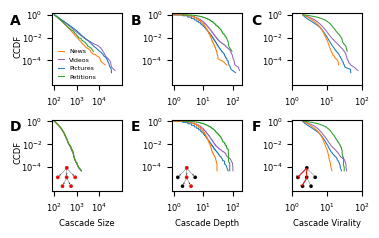

In [52]:
# Now plot...
destinations = ['Outputs/Figures/']

Goel_ccdfs(Goel_topology,Goel_example_cascades,destinations=destinations)


In [57]:
#EXTRA FIGS

# Now sample... 

#model = 'IC'

sample_many_times = False

Goel_example_cascades_pairwise = {}

#for school in ['Cornell','athletes'] :
#example_cascades_networks[model][school] = {'full':{}}
#for key in Goel_data.keys() :
#    _,Goel_example_cascades[key]=sample_topology(1,Goel_data,treatment_name='news',variables=['size','max.depth','avg.dist'],control_name=key)
domains = ['news','videos','pictures','petitions']

for domain1 in domains :
    for domain2 in domains :
        if (domain1 != domain2) :
            Goel_example_cascades_pairwise[domain1+'vs'+domain2] = {}
            _,Goel_example_cascades_pairwise[domain1+'vs'+domain2] = sample_topology(1,Goel_data,treatment_name=domain1,variables=['size','max.depth','avg.dist'],control_name=domain2)





Doing experiment 0 out of 1
Doing experiment 0 out of 1
Doing experiment 0 out of 1
Doing experiment 0 out of 1
Doing experiment 0 out of 1
Doing experiment 0 out of 1
Doing experiment 0 out of 1
Doing experiment 0 out of 1
Doing experiment 0 out of 1
Doing experiment 0 out of 1
Doing experiment 0 out of 1
Doing experiment 0 out of 1


/home/jlj/Dropbox/PhD/Structural_virality/Aral_method_test/definitions_clean_RR.py:7846: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/jlj/Dropbox/PhD/Structural_virality/Aral_method_test/definitions_clean_RR.py:7846: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/jlj/Dropbox/PhD/Structural_virality/Aral_method_test/definitions_clean_RR.py:7846: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/jlj/Dropbox/PhD/Structural_virality/Aral_method_test/definitions_clean_RR.py:7846: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/jlj/Dropbox/PhD/Structural_virality/Aral_method_test/definitions_clean_RR.py:7846: UserWarning: This f

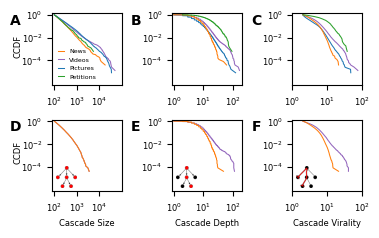

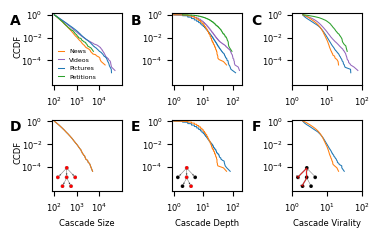

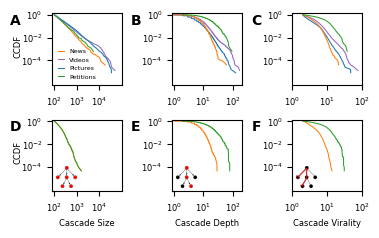

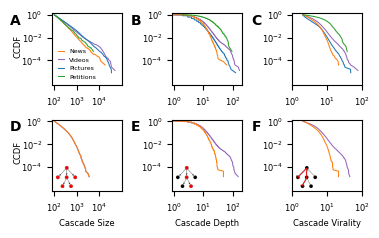

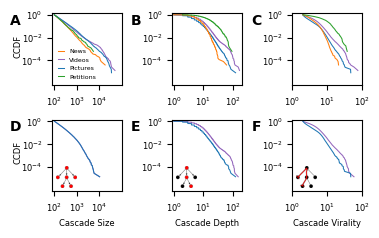

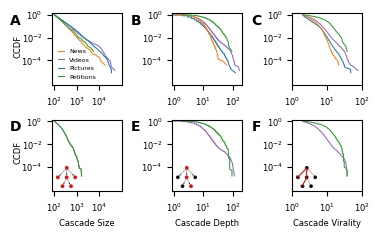

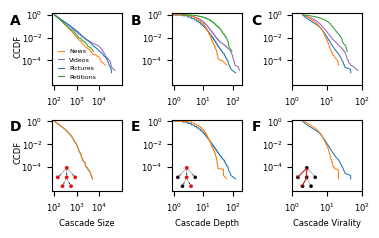

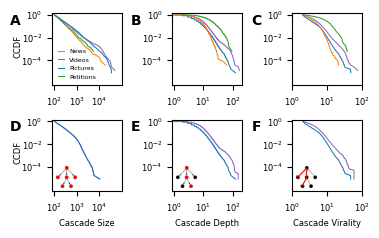

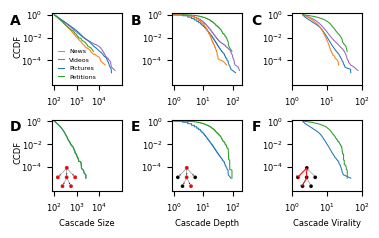

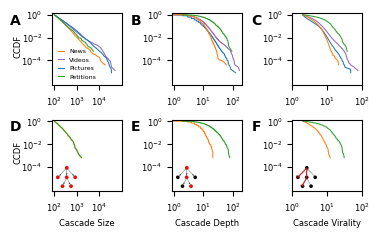

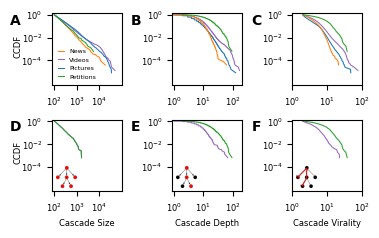

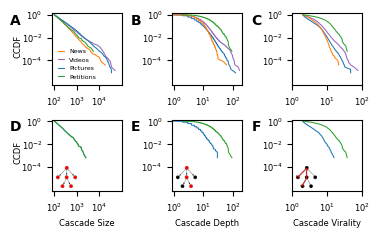

In [58]:
# Pairwise plots
for domain1 in domains :
    for domain2 in domains :
        if (domain1 != domain2) :


            key = domain1+'vs'+domain2

            Goel_ccdfs(Goel_topology,Goel_example_cascades_pairwise[key],destinations=['Outputs/Figures/Goel_pairwise/'],figname=key)


# Vosoughi, make degree dists


In [59]:
cascade_data_new, cascade_data_categories_new = import_truefalsedata()#import_truefalsedata_new()

Reading metadata...
Make sure that the Prufer Sequence has been saved for each cascade. Key should be 'prufer_sequence'. Networkx can help get the prufer sequence for each cascade when build with Vosoughi et al.'s code.


In [60]:
## SIR:
#filename_cascades = 'SIR_data/Cascades_Rspread%s00000_MinimumCascadeSize1.txt'%R0
SIR_PS_dataset = {}
for R0 in [0.8,0.9] :
    print("Doing R0 = ",R0)
    SIR_PS_dataset[R0] = get_dataset_and_pruferset_models('SIR_data/Cascades_Rspread%s00000_MinimumCascadeSize1.txt'%R0)

IC_PS_dataset = {}
for R0 in [0.8,0.9] :
    print("Doing R0 = ",R0)
    IC_PS_dataset[R0] = get_dataset_and_pruferset_models('IC_data/ICCascades_Rspread%s00000_MinimumCascadeSize1.txt'%R0)


Doing R0 =  0.8
Doing R0 =  0.9
Doing R0 =  0.8
Doing R0 =  0.9


In [61]:
# Get SIR
offsprings = {}
offsprings['SIR80'],offsprings['SIR80_root'],offsprings['SIR80_nonroot'] = offspring_dist(SIR_PS_dataset[0.8])
offsprings['SIR90'],offsprings['SIR90_root'],offsprings['SIR90_nonroot'] = offspring_dist(SIR_PS_dataset[0.9])


pvalues_original = {}
stat,pSIR=scipy.stats.ks_2samp(offsprings['SIR80'],offsprings['SIR90'])
pvalues_original['SIR'] = pSIR


In [62]:
# Get IC
offsprings['IC80'],offsprings['IC80_root'],offsprings['IC80_nonroot'] = offspring_dist(IC_PS_dataset[0.8])
offsprings['IC90'],offsprings['IC90_root'],offsprings['IC90_nonroot'] = offspring_dist(IC_PS_dataset[0.9])

stat,pIC=scipy.stats.ks_2samp(offsprings['IC80'],offsprings['IC90'])
pvalues_original['IC'] = pIC

In [ ]:
pvalues = {'SIR':[],'IC':[],'TrueFalse':[]}

if (sample_many_times == True) :
    for exp in range (1000):
        if(exp//100 == exp/100) :
            print("Now doing exp",exp)
        _,example_cascades=sample_topology(1,SIR_PS_dataset, treatment_name = 0.8, control_name = 0.9,variables = ['size','prufer_sequence'])
        offsprings_examples = {}
        offsprings_examples['SIR80'],offsprings_examples['SIR80_root'],offsprings_examples['SIR80_nonroot'] = offspring_dist_subsampled(example_cascades[0.8])
        offsprings_examples['SIR90'],offsprings_examples['SIR90_root'],offsprings_examples['SIR90_nonroot'] = offspring_dist_subsampled(example_cascades[0.9])
        stat,pSIR=scipy.stats.ks_2samp(offsprings_examples['SIR80'],offsprings_examples['SIR90'])
        pvalues['SIR'].append(pSIR)

In [83]:
combined_data = {'IC80':copy.deepcopy(IC_PS_dataset[0.8]),
                'IC90':copy.deepcopy(IC_PS_dataset[0.9]),
                'SIR80':copy.deepcopy(SIR_PS_dataset[0.8]),
                'SIR90':copy.deepcopy(SIR_PS_dataset[0.9])                
                }
_,example_cascades=sample_topology(1,combined_data, treatment_name = 'IC80', control_name = 'SIR80',variables = ['size','prufer_sequence'])

offsprings_examples['IC_SIR80vsIC80'],offsprings_examples['IC_SIR80vsIC80_root'],offsprings_examples['IC_SIR80vsIC80_nonroot'] = offspring_dist_subsampled(example_cascades['IC80'])
offsprings_examples['SIR_SIR80vsIC80'],offsprings_examples['SIR_SIR80vsIC80_root'],offsprings_examples['SIR_SIR80vsIC80_nonroot'] = offspring_dist_subsampled(example_cascades['SIR80'])

_,example_cascades=sample_topology(1,combined_data, treatment_name = 'IC90', control_name = 'SIR90',variables = ['size','prufer_sequence'])

offsprings_examples['IC_SIR90vsIC90'],offsprings_examples['IC_SIR90vsIC90_root'],offsprings_examples['IC_SIR90vsIC90_nonroot'] = offspring_dist_subsampled(example_cascades['IC90'])
offsprings_examples['SIR_SIR90vsIC90'],offsprings_examples['SIR_SIR90vsIC90_root'],offsprings_examples['SIR_SIR90vsIC90_nonroot'] = offspring_dist_subsampled(example_cascades['SIR90'])


Doing experiment 0 out of 1
Yep
Doing experiment 0 out of 1


In [84]:
offsprings['TRUE'],offsprings['TRUE_root'],offsprings['TRUE_nonroot'] = offspring_dist(cascade_data_new['TRUE'])
offsprings['FALSE'],offsprings['FALSE_root'],offsprings['FALSE_nonroot'] = offspring_dist(cascade_data_new['FALSE'])

stat,pTrueFalse=scipy.stats.ks_2samp(offsprings['TRUE'],offsprings['FALSE'])
pvalues_original['TrueFalse'] = pTrueFalse


In [ ]:
offsprings_examples = {}

In [85]:
if (sample_many_times == True) :
    pdeg,example_cascades=sample_topology(10000,cascade_data_new, treatment_name = 'TRUE', control_name = 'FALSE',variables = ['size','depth','max_breadth','virality','prufer_sequence'])
    offsprings_examples['TRUE'],offsprings_examples['TRUE_root'],offsprings_examples['TRUE_nonroot'] = offspring_dist_subsampled(example_cascades['TRUE'])
    offsprings_examples['FALSE'],offsprings_examples['FALSE_root'],offsprings_examples['FALSE_nonroot'] = offspring_dist_subsampled(example_cascades['FALSE'])
    
    

In [86]:
if (sample_many_times == True) :
    
    for exp in range (1000) :
        if (exp/100 == exp//100) :
            print("Doing exp",exp)
        pdeg,example_cascades=sample_topology(1,cascade_data_new, treatment_name = 'TRUE', control_name = 'FALSE',variables = ['size','depth','max_breadth','virality','prufer_sequence'])
        offsprings_examples['TRUE'],offsprings_examples['TRUE_root'],offsprings_examples['TRUE_nonroot'] = offspring_dist_subsampled(example_cascades['TRUE'])
        offsprings_examples['FALSE'],offsprings_examples['FALSE_root'],offsprings_examples['FALSE_nonroot'] = offspring_dist_subsampled(example_cascades['FALSE'])

        stat,pTrueFalse=scipy.stats.ks_2samp(offsprings_examples['TRUE'],offsprings_examples['FALSE'])
        pvalues['TrueFalse'].append(pTrueFalse)

In [ ]:
KS_make_table_degrees(pvalues_original,pvalues,quantile=0.10)

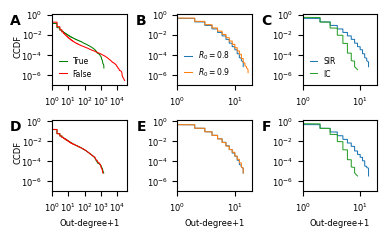

In [91]:
for veracity in offsprings_examples.keys() :
    offsprings_examples[veracity] = sorted(offsprings_examples[veracity])
    
destinations = ['Outputs/Figures/']

Plot_degrees(offsprings,offsprings_examples,destinations)    

### LOGISTIC Reg. (Vosoughi)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

cascade_data_logistic = {'TRUE':{},'FALSE':{}}

cascade_data_logistic['TRUE'] = {'depth':[],
                'max_breadth':[],
                'virality':[],
                 'size':[],
                 'veracity-true':[]
                }
cascade_data_logistic['FALSE'] = {'depth':[],
                'max_breadth':[],
                'virality':[],
                 'size':[],
                 'veracity-true':[]
                }

for veracity in ['TRUE','FALSE'] :
    for size in cascade_data[veracity].keys() :
        for cascade_id in cascade_data[veracity][size].keys() :
            for category in cascade_data_logistic['TRUE'].keys() :
                if (category == 'veracity-true') :
                    if (veracity == 'TRUE') :
                        var = 1
                    else : 
                        var = 0
                    cascade_data_logistic[veracity][category].append(var)
                else :
                    cascade_data_logistic[veracity][category].append(float(cascade_data[veracity][size][cascade_id][category]))



accuracy_original = []

Nids = 24342            


feature_importance = [[],[],[],[]]

print("The following is time consuming")
rx = []
if (sample_many_times == True) :
    for exp in range (1000) :
        random_true_arr = np.concatenate((np.ones((Nids)),np.zeros((len(cascade_data_logistic['TRUE']['depth'])-Nids))))
        random_false_arr = np.concatenate((np.ones((Nids)),np.zeros((len(cascade_data_logistic['FALSE']['depth'])-Nids))))

        if (exp//100==exp/100) :
            print(exp)    

        rt = copy.copy(random_true_arr)
        random.shuffle(random_true_arr)
        random.shuffle(random_false_arr)


        logistic_data = {'depth':np.array([]),
                        'max_breadth':np.array([]),
                        'virality':np.array([]),
                         'size':np.array([]),
                         'veracity-true':np.array([])
                        }

        for category in logistic_data.keys():
            if (len(logistic_data[category]) == 0) :
                logistic_data[category] = np.array(cascade_data_logistic['TRUE'][category])[copy.copy(random_true_arr).astype(bool)].astype(int)
                logistic_data[category] = np.concatenate((logistic_data[category].astype(int),np.array(cascade_data_logistic['FALSE'][category]).astype(int)[copy.copy(random_false_arr).astype(bool)]))

            else : 
                logistic_data[category] = np.concatenate((logistic_data[category].astype(int),np.array(cascade_data_logistic['TRUE'][category])[copy.copy(random_true_arr).astype(bool)]))
                logistic_data[category] = np.concatenate((logistic_data[category].astype(int),np.array(cascade_data_logistic['FALSE'][category])[copy.copy(random_false_arr).astype(bool)]))


        logistic_df = pd.DataFrame(copy.copy(logistic_data),columns= ['depth', 'max_breadth','virality','size','veracity-true'])

        X = copy.copy(logistic_df[['depth', 'max_breadth','virality','size']])
        y = copy.copy(logistic_df['veracity-true'])

        rx = copy.copy(X['virality'])

        X_train,X_test,y_train,y_test = copy.copy(train_test_split(X,y,test_size=0.25,random_state=0))
        random.seed(a=None)

        logistic_regression= LogisticRegression()
        logistic_regression.fit(X_train,y_train)
        y_pred=logistic_regression.predict(X_test)

        accuracy_original.append(copy.copy(metrics.accuracy_score(y_test, y_pred)))

        importance = logistic_regression.coef_[0]
        for f_imp in range (len(feature_importance)) :
            feature_importance[f_imp].append(importance[f_imp])

In [ ]:
accuracy = []
feature_importance_s = [[],[],[],[]]

if (sample_many_times == True) :

    for exp in range (1000) :
        if (exp//100==exp/100) :
            print(exp)
        _,example_cascades=sample_topology(1,cascade_data, treatment_name = 'TRUE', control_name = 'FALSE')


        logistic_data = {'depth':[],
                        'max_breadth':[],
                        'virality':[],
                         'size':[],
                         'veracity-true':[]
                        }



        for veracity in ['TRUE','FALSE'] :
            for category in logistic_data.keys():
                if (category == 'veracity-true') :
                    logistic_data[category] += [int(veracity == 'TRUE')]*len(example_cascades['TRUE']['depth'])


                else :
                    logistic_data[category] += example_cascades[veracity][category]

        logistic_df = pd.DataFrame(logistic_data,columns= ['depth', 'max_breadth','virality','size','veracity-true'])

        X = logistic_df[['depth', 'max_breadth','virality','size']]
        y = logistic_df['veracity-true']

        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)


        logistic_regression= LogisticRegression()
        logistic_regression.fit(X_train,y_train)
        y_pred=logistic_regression.predict(X_test)

        accuracy.append(metrics.accuracy_score(y_test, y_pred))

        importance = logistic_regression.coef_[0]
        for f_imp in range (len(feature_importance_s)) :
            feature_importance_s[f_imp].append(importance[f_imp])    
    np.save(destination+'FalseTrue_ExampleCurves_LogisticReg.npy',accuracy)


In [92]:
accuracy = np.load(destination+'FalseTrue_ExampleCurves_LogisticReg.npy',allow_pickle = True)#.item()
accuracy_original = np.load(destination+'FalseTrue_LogisticReg.npy',allow_pickle = True)#.item()


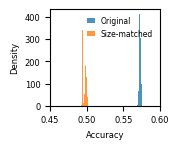

In [93]:
plt.figure(figsize=(cm_to_inch(4.5),cm_to_inch(3.75)))

# FONTS
EVEN_SMALLER_SIZE = 5.5
SMALL_SIZE = 6
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

# GENERAL SETTINGS
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=EVEN_SMALLER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


plt.hist(accuracy_original,bins=10,density=True,alpha=0.8,label='Original')
plt.hist(accuracy,bins=10,density=True,alpha=0.8,label='Size-matched')
plt.xlim([0.45,.60])
plt.xlabel('Accuracy')
plt.ylabel('Density')
plt.legend(loc=1,frameon=False, handlelength=1)
plt.tight_layout()
plt.savefig('Outputs/Figures/Logistic_reg_sidebyside.png',dpi=400)